## Introduction to problem

Bangalore, also known as Silicon City of India is a hub of 1.5M employees belonging to various IT and ITeS sector. Significant number of employees residing in various parts of bangalore are from various parts of the country. This also has created a hugh demand of rental properties in various Neighborhoods. This project would concentrate on the need to understand the rental market better and understand if average rental prices differ in various neigborhood and if yes then by how much. This analysis report would help owners understand the variables which impact the rental prices and for tenants this analysis would help them identify neighborhood according to their budgets and needs. Through this report, i would like to answer following questions:

1. Which are the top neighborhoods in bangalore where supply of rental properties are large ?
2. What are the ranges of rents in these neighborhood ?
3. What are the top 10 venues in these locations ?
4. Is there any relationship between sqft area, furnishings, no of bedrooms, bathroom, house facing on the rental prices ?
6. which neighborhood are similar?

## Data 

For this project and it's objective, I would require following data:

1. Property Rental data for Bangalore City, India
2. Geolocation data for different neighborhoods identified in the property rental data
3. Major venues data in neighborhoods identified above. 

Data used for this project will be from the following sources:

1. Makaan.com - Use beautifulsoup to scrap property listing data. Details required would be property rentals, Area Sqft, bedrooms, Bathrooms, Houre Facing details, furnishing etc.

2. Use FourSquare places API to explore venues and venue categories. 

### Data Collection Process

Step 1: The data was scraped from Makaan.com. All relevant data points were captured. Post collection, dataframe would be analyzed for any missing values, wrong addresses, incorrect entries. These will be cross checked and cleaned using Python/Excel tool .

Step 2: Foursquare API

For each identified neighborhood, geopy module to convert an address into latitude and longitude values. For each neighborhood’s coordinate, we will call FourSquare API to get the trending venues in that location.

### Using data to solve the problem

The objective of analyzing the property rentals data is to get a fair idea about the neighborhoods and variables which may impact the property rental prices. As bangalore has already seen a significant migration of employees from different parts of the country and it would be helpful if we can get a fair idea about the rental ranges, what kind of apartments are in good supply, which areas of the city are generating lots of property rental advertisements. Visualization, Cluster Analysis and basic regression would be used to derive insights and findings. 


## Data Scraping from Makaan.com using Beautiful soup. Once scraped, save to rental_df.csv file. 

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import folium
import googlemaps
import numpy as np
import random
from geopy.geocoders import Nominatim # module to convert address into lat and long.
from IPython.display import Image
from IPython.core.display import HTML
from pandas.io.json import _json_normalize

In [53]:
#geo = soup.find_all('div', itemprop ='geo')
# title = soup.find_all('div', class_ ='title-line')[0].get_text()
# locality = soup.find_all('a', class_ ='loclink')[0].get_text()
# price = soup.find_all('td', class_ ='price')[0].get_text()
# furnish_nonfurnish = soup.find_all('tr', class_='hcol w44')[0].get_text()
# size = soup.find_all('td', class_='size')[0].get_text()

In [178]:
## Scraping 500 pages of magicbricks with 21 listings on each page.  

rental_temp = []
Final_List_rentals = []

for i in range(1,500):
    
    URL = 'https://www.makaan.com/bangalore-residential-property/rent-property-in-bangalore-city?page={}'.format(i)
    response = requests.get(URL)
    soup = BeautifulSoup(response.text, 'html.parser')
    table = soup.find_all('li', class_='cardholder')

    for j in range(len(table)):

        try:
            geo = str(table[j].find_all('div', itemprop ='geo')[0]).replace('<div itemprop="geo" itemscope="" itemtype="http://schema.org/GeoCoordinates"><meta content=',"").replace('" itemprop="latitude"/><meta content="',",").replace('" itemprop="longitude"/></div>',"").replace('"',"")
            #print(geo)
        except:
            geo = ""
        try:
            title = table[j].find_all('div', class_='title-line')[0].get_text()
            #print(title)
        except:    
            title = ""

        try:    
            locality = table[j].find_all('a', class_='loclink')[0].get_text()
            #print(locality)
        except:
            locality =""

        try:    
            rent = table[j].find_all('td', class_='price')[0].get_text()
            #print(rent)
        except:
            rent = ""
        try:    
            furnish = table[j].find_all('tr', class_='hcol w44')[0].get_text()
            #print(furnish)

        except:  
            furnish = ""
        try:    
            area = table[j].find_all('td', class_='size')[0].get_text()
            #print(area)
        except:
            area = ""
            
            
        try:    
            deposit = table[j].find_all('li', title='deposit')[0].get_text()
            #print(area)
        except:
            deposit = ""
            
            
        try:    
            bathroom = table[j].find_all('li', title='bathrooms')[0].get_text()
            #print(area)
        except:
            deposit = ""
            
            
        try:    
            facing = table[j].find_all('li', title='facing')[0].get_text()
            #print(area)
        except:
            deposit = ""
            
                

        list_rentals_SRCard = [[geo,title,locality,rent,furnish,area,deposit, bathroom, facing]]
        print(list_rentals_SRCard)

        rental_temp = rental_temp + list_rentals_SRCard
        
Final_List_rentals = Final_List_rentals + rental_temp

[['12.90740967,77.64221191', '1 BHK Independent House', 'HSR Layout, Bangalore', ' 15,000 ', 'Semi-FurnishedStatus', '500 ', 'No Deposit', '1 bathrooms', 'East facing']]
[['12.97375488,77.70182037', '2 BHK Apartment', 'Kartik Nagar, Bangalore', ' 25,000 ', 'UnfurnishedStatus', '1200 ', 'No Deposit', '2 bathrooms', 'West facing']]
[['12.91322803,77.63796234', '4 BHK Independent House', 'HSR Layout, Bangalore', ' 1.3 L', 'Semi-FurnishedStatus', '4000 ', 'No Deposit', '5 bathrooms', 'NorthEast facing']]
[['12.97781372,77.64569092', '3 BHK Apartment in Evantha The Hummingbird', 'Indira Nagar, Bangalore', ' 1 L', 'UnfurnishedStatus', '1990 ', 'No Deposit', '3 bathrooms', 'South facing']]
[['', '', '', '', '', '', '', '3 bathrooms', 'South facing']]
[['13.04968452,77.60855865', '2 BHK Apartment', 'Nagavara, Bangalore', ' 12,500 ', 'UnfurnishedStatus', '800 ', 'No Deposit', '2 bathrooms', 'East facing']]
[['12.92893124,77.62676239', '2 BHK Independent House', 'Koramangala, Bangalore', ' 35,00

In [205]:
rental_df.head(5)

Title                 Location  \
0                     1 BHK Independent House    HSR Layout, Bangalore   
1                             2 BHK Apartment  Kartik Nagar, Bangalore   
2                     4 BHK Independent House    HSR Layout, Bangalore   
3  3 BHK Apartment in Evantha The Hummingbird  Indira Nagar, Bangalore   
4                                                                        

       Rent           Furnishings Area-sqft     Deposit     Bathroom  \
0   15,000   Semi-FurnishedStatus      500   No Deposit  1 bathrooms   
1   25,000      UnfurnishedStatus     1200   No Deposit  2 bathrooms   
2     1.3 L  Semi-FurnishedStatus     4000   No Deposit  5 bathrooms   
3       1 L     UnfurnishedStatus     1990   No Deposit  3 bathrooms   
4                                                        3 bathrooms   

             Facing  Address_lat  Address_lng  
0       East facing  12.90740967  77.64221191  
1       West facing  12.97375488  77.70182037  
2  NorthEast facing  12.91322803  77.63796234  
3      South facing  12.97781372  77.64569092  
4      South facing                      None

In [206]:
#Geolocation latitude and longitude are split into two separate columns.
#new = rental_df["Geolocation"].str.split(",", n = 1, expand = True)

#rental_df['Address_lat'] = new[0]
#rental_df['Address_lng'] = new[1]

## Drop Geolocation column from the dataframe
#rental_df = rental_df.drop(columns = ['Geolocation'])

#rental_df.drop(columns = ['Unnamed: 0'], inplace=True)

#rental_df.to_csv('rental_df.csv')

### Only 1,2,3,4 BHK properties are considered and exceptionally high rental properties were excluded from the data. Also, Data was cleaned for Nan, missing values, Address name corrections. Some of the neighborhood which belong to a bigger neighborhood were also clubbed together. For example, JP Nagar, Jayanagar, HSR, HRBR, HBR etc. There were total 669 neighborhood which were considered for this project.

In [3]:
## Cleaned data was saved and read back to rental_dff dataframe.
rental_dff = pd.read_csv("Rental_dff.csv")

In [4]:
### Some basic description using describe.
rental_dff.describe()

Rent    Area-sqft      Bedroom     Bathroom  Address_lat  \
count    9846.000000  9846.000000  9846.000000  9846.000000  9846.000000   
mean    23346.433374  1046.150924     1.770770     1.740199    12.982607   
std     16068.538256   600.183212     0.793551     0.802322     0.267426   
min      3000.000000   100.000000     1.000000     1.000000    12.737842   
25%     14000.000000   600.000000     1.000000     1.000000    12.912680   
50%     19500.000000  1000.000000     2.000000     2.000000    12.950844   
75%     28000.000000  1250.000000     2.000000     2.000000    12.980964   
max    175000.000000  7500.000000     4.000000     5.000000    28.636423   

       Address_lng    Furnished  Semifurnished  Unfurnished  East facing  \
count  9846.000000  9846.000000    9846.000000  9846.000000  9846.000000   
mean     77.659782     0.086939       0.826021     0.087040     0.467703   
std       0.097909     0.281760       0.379111     0.281909     0.498981   
min      77.227448     0.000000       0.000000     0.000000     0.000000   
25%      77.615616     0.000000       1.000000     0.000000     0.000000   
50%      77.645847     0.000000       1.000000     0.000000     0.000000   
75%      77.681000     0.000000       1.000000     0.000000     1.000000   
max      78.039696     1.000000       1.000000     1.000000     1.000000   

       West facing  NorthEast facing  South facing  North facing  \
count  9846.000000       9846.000000   9846.000000   9846.000000   
mean      0.081556          0.061243      0.048954      0.277270   
std       0.273701          0.239788      0.215783      0.447674   
min       0.000000          0.000000      0.000000      0.000000   
25%       0.000000          0.000000      0.000000      0.000000   
50%       0.000000          0.000000      0.000000      0.000000   
75%       0.000000          0.000000      0.000000      1.000000   
max       1.000000          1.000000      1.000000      1.000000   

       NorthWest facing  SouthEast facing  SouthWest facing  
count       9846.000000       9846.000000       9846.000000  
mean           0.051595          0.009445          0.002234  
std            0.221218          0.096733          0.047219  
min            0.000000          0.000000          0.000000  
25%            0.000000          0.000000          0.000000  
50%            0.000000          0.000000          0.000000  
75%            0.000000          0.000000          0.000000  
max            1.000000          1.000000          1.000000

In [222]:
rental_dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9846 entries, 0 to 9845
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             9846 non-null   object 
 1   Location          9845 non-null   object 
 2   Rent              9846 non-null   int64  
 3   Area-sqft         9846 non-null   int64  
 4   Bedroom           9846 non-null   int64  
 5   Bathroom          9846 non-null   int64  
 6   Address_lat       9846 non-null   float64
 7   Address_lng       9846 non-null   float64
 8   Furnished         9846 non-null   int64  
 9   Semifurnished     9846 non-null   int64  
 10  Unfurnished       9846 non-null   int64  
 11  East facing       9846 non-null   int64  
 12  West facing       9846 non-null   int64  
 13  NorthEast facing  9846 non-null   int64  
 14  South facing      9846 non-null   int64  
 15  North facing      9846 non-null   int64  
 16  NorthWest facing  9846 non-null   int64  


In [223]:
rental_dff.head(5)

Title                            Location   Rent  \
0  2 BHK Independent House  3G Homes Crimson Layout, Bangalore  10500   
1  2 BHK Independent House  3G Homes Crimson Layout, Bangalore   9500   
2  1 BHK Independent House  3G Homes Crimson Layout, Bangalore   7000   
3  1 BHK Independent House  3G Homes Crimson Layout, Bangalore   6500   
4  1 BHK Independent House  3G Homes Crimson Layout, Bangalore   7500   

   Area-sqft  Bedroom  Bathroom  Address_lat  Address_lng  Furnished  \
0       1111        2         2    12.987072    77.762878          0   
1       1111        2         2    12.987072    77.762878          0   
2        666        1         1    12.987072    77.762878          0   
3        666        1         1    12.987072    77.762878          0   
4        666        1         1    12.987072    77.762878          0   

   Semifurnished  Unfurnished  East facing  West facing  NorthEast facing  \
0              1            0            0            0                 0   
1              1            0            0            0                 0   
2              1            0            0            0                 0   
3              1            0            0            0                 0   
4              1            0            0            0                 0   

   South facing  North facing  NorthWest facing  SouthEast facing  \
0             0             0                 1                 0   
1             0             0                 1                 0   
2             0             0                 1                 0   
3             0             0                 1                 0   
4             0             0                 1                 0   

   SouthWest facing  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [15]:
## Remove blank rows from the data.

#nan_value = float("NaN")
#rental_df.replace("", nan_value, inplace=True)
#rental_df.dropna(inplace = True)

### derive number of bedrooms from Title column

#rental_df['No_bedrooms'] = rental_df['Title'].str[0]

#rental_df = rental_df.reset_index()

#rental_df.drop(columns = ['level_0','index'], inplace=True)

In [5]:
### Saving a copy of the rental_dff dataframe.
#rental_data_df = pd.read_csv('rental_df.csv')
rental_data_df = rental_dff

In [18]:
#rental_data_df.drop(columns = ['Unnamed: 0'], inplace = True)

In [227]:
rental_data_df.head(5)

Title                            Location   Rent  \
0  2 BHK Independent House  3G Homes Crimson Layout, Bangalore  10500   
1  2 BHK Independent House  3G Homes Crimson Layout, Bangalore   9500   
2  1 BHK Independent House  3G Homes Crimson Layout, Bangalore   7000   
3  1 BHK Independent House  3G Homes Crimson Layout, Bangalore   6500   
4  1 BHK Independent House  3G Homes Crimson Layout, Bangalore   7500   

   Area-sqft  Bedroom  Bathroom  Address_lat  Address_lng  Furnished  \
0       1111        2         2    12.987072    77.762878          0   
1       1111        2         2    12.987072    77.762878          0   
2        666        1         1    12.987072    77.762878          0   
3        666        1         1    12.987072    77.762878          0   
4        666        1         1    12.987072    77.762878          0   

   Semifurnished  Unfurnished  East facing  West facing  NorthEast facing  \
0              1            0            0            0                 0   
1              1            0            0            0                 0   
2              1            0            0            0                 0   
3              1            0            0            0                 0   
4              1            0            0            0                 0   

   South facing  North facing  NorthWest facing  SouthEast facing  \
0             0             0                 1                 0   
1             0             0                 1                 0   
2             0             0                 1                 0   
3             0             0                 1                 0   
4             0             0                 1                 0   

   SouthWest facing  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

### Exploratory analysis

In [228]:
# Lets take the top 50 locations and plot bar graph
histo = rental_data_df.groupby('Location')['Title'].count()



histo_sort = histo.sort_values()[-60:]

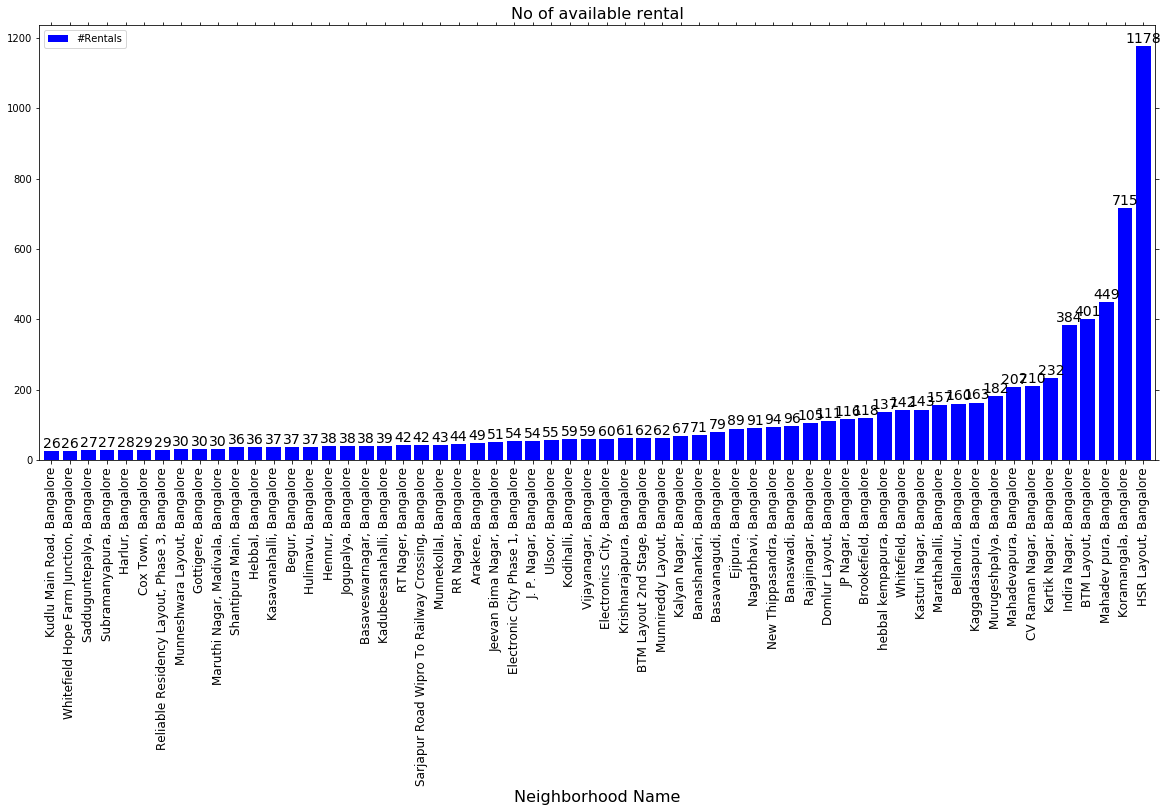

In [229]:
ax = histo_sort.plot(kind='bar', figsize=(20, 8), rot=90, width = 0.8, color=[ 'blue'])
rects = ax.patches
labels = list(histo_sort)
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 1, label,
            ha='center', va='bottom', fontsize=14)
ax.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on') # remove borders
ax.xaxis.set_tick_params(labelsize=12) # set xticks as 14
ax.legend(fontsize=14) # set legend sie as 14
ax.set_title('No of available rental', fontsize=16) # set title and add font size as 16
ax.set_xlabel('Neighborhood Name', fontsize=16)
#ax.grid(False)  # remove grid
ax.set_facecolor("white") # set bg color white
ax.legend(['#Rentals'])

### As seen above most of the rental properties exists in the following neighborhoods:
1. HSR Layout
2. Koramangala
3. Mahadevpura
4. BTM Layout
5. Indiranagar
6. Kartiknagar
7. Murugeshpalya

In [338]:
histo_bedroom = rental_data_df.groupby('Bedroom')['Title'].count()
# Lets take the top 60 neighborhoods and plot bar graph
histo_bedroom_sort = histo_bedroom.sort_values()[-60:]

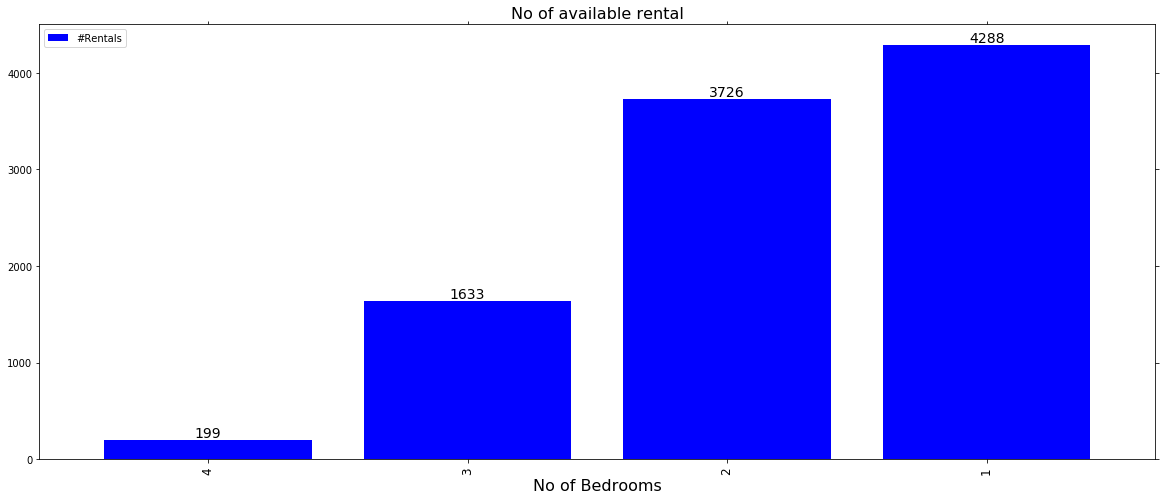

In [339]:
ax = histo_bedroom_sort.plot(kind='bar', figsize=(20, 8), rot=90, width = 0.8, color=[ 'blue'])
rects = ax.patches
labels = list(histo_bedroom_sort)
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 1, label,
            ha='center', va='bottom', fontsize=14)
ax.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on') # remove borders
ax.xaxis.set_tick_params(labelsize=12) # set xticks as 14
ax.legend(fontsize=14) # set legend sie as 14
ax.set_title('No of available rental', fontsize=16) # set title and add font size as 16
ax.set_xlabel('No of Bedrooms', fontsize=16)
#ax.grid(False)  # remove grid
ax.set_facecolor("white") # set bg color white
ax.legend(['#Rentals'])

### As seen above 1BHK and 2BHK are in good numbers. 

## Locations are basically the neighborhoods and each neighborhood's geolocation would be needed to understand the density on rental properties.

In [237]:
# location = [x for x in rental_data_df['Location'].unique().tolist() if type(x) == str]
# latitude = []
# longitude =  []
# for i in range(0, len(location)):
#     if(type(location[i]) == str):
#         ctr=0
#         while True:
#             try:
#                 address = location[i] + ', India'
#                 geolocator = Nominatim(user_agent="blr_explorer")
#                 loc = geolocator.geocode(address)
#                 latitude.append(loc.latitude)
#                 longitude.append(loc.longitude)
#                 print('The geograpical coordinate of location are {}, {}.'.format(loc.latitude, loc.longitude))
#             except:
#                 ctr+=1
#                 if(ctr==7):
#                     print(i)
#                     latitude.append(address)
#                     longitude.append(address)
#                     break
#                 continue
#             break

In [238]:
#location

In [16]:
# rental_data_df['location_latitude'] = rental_data_df['Location'].map(dict(zip(location, latitude)))
# rental_data_df['location_longitude'] = rental_data_df['Location'].map(dict(zip(location, longitude)))

In [236]:
rental_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9846 entries, 0 to 9845
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             9846 non-null   object 
 1   Location          9845 non-null   object 
 2   Rent              9846 non-null   int64  
 3   Area-sqft         9846 non-null   int64  
 4   Bedroom           9846 non-null   int64  
 5   Bathroom          9846 non-null   int64  
 6   Address_lat       9846 non-null   float64
 7   Address_lng       9846 non-null   float64
 8   Furnished         9846 non-null   int64  
 9   Semifurnished     9846 non-null   int64  
 10  Unfurnished       9846 non-null   int64  
 11  East facing       9846 non-null   int64  
 12  West facing       9846 non-null   int64  
 13  NorthEast facing  9846 non-null   int64  
 14  South facing      9846 non-null   int64  
 15  North facing      9846 non-null   int64  
 16  NorthWest facing  9846 non-null   int64  


In [21]:
#rental_data_df.to_csv("rental_data_location_update.csv")

In [23]:
#rental_data_df.to_csv("rental_data_location_update.csv")
# rental_data_dff = pd.read_csv("rental_data_location_update.csv", dtype={'Title': np.str,'Location': np.str,' Rent ':np.float64 ,
#                                                                        'Furnishings':np.str ,'Area-sqft': np.int64 ,'Address_lat':np.float64 ,'Address_lng':np.float64 ,'No_bedrooms':np.int64 ,
#                                                                        'location_latitude':np.float64 ,'location_longitude':np.float64 })

In [242]:
# rental_data_dff.drop(columns = 'Unnamed: 0', inplace=True)
# #rental_data_dff.info()
# rental_data_dff.head(15)

### Analyze location/neighborhood wise properties counts

In [245]:
dataframe_filtered = rental_data_df.groupby(['Location'])['Address_lat', 'Address_lng'].first()
dataframe_filtered['properties_count'] = rental_data_df.groupby(['Location'])['Title'].count()

/Users/loveypathak/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [246]:
dataframe_filtered

Address_lat  Address_lng  \
Location                                                                       
3G Homes Crimson Layout, Bangalore                    12.987072    77.762878   
3rd Stage BEML Layout, Bangalore                      12.919145    77.520432   
9th Main Hongasandra GB Palya Road, Bangalore         12.897584    77.629189   
AECS Layout D Block Bangalore, Bangalore              12.960690    77.711891   
AECS Layout Sri Nivasa Reddy Layout, Bangalore        12.963762    77.708984   
...                                                         ...          ...   
koramangla 1st block, Bangalore                       12.926976    77.637222   
krishnarajapura, Bangalore                            13.004017    77.687775   
prabhavathi residency 2 Nyanappanahalli Arakere...    12.878379    77.617813   
seegehalli, Bangalore                                 13.010673    77.764023   
thirumenahalli, Bangalore                             13.085955    77.623779   

                                                    properties_count  
Location                                                              
3G Homes Crimson Layout, Bangalore                                 7  
3rd Stage BEML Layout, Bangalore                                   1  
9th Main Hongasandra GB Palya Road, Bangalore                      1  
AECS Layout D Block Bangalore, Bangalore                           1  
AECS Layout Sri Nivasa Reddy Layout, Bangalore                     8  
...                                                              ...  
koramangla 1st block, Bangalore                                    6  
krishnarajapura, Bangalore                                         2  
prabhavathi residency 2 Nyanappanahalli Arakere...                 1  
seegehalli, Bangalore                                              1  
thirumenahalli, Bangalore                                          1  

[668 rows x 3 columns]

In [247]:
venues_map = folium.Map(location=[12.934533, 77.626579], zoom_start=11) # generate map centred around Bengaluru

neigh = folium.map.FeatureGroup()
i=0
for lat, lng, in zip(dataframe_filtered.Address_lat, dataframe_filtered.Address_lng):
    neigh.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
        )
    )
    i+=1
i=0
for lat, lng, in zip(dataframe_filtered.Address_lat, dataframe_filtered.Address_lng):
    neigh.add_child(
        folium.features.Marker(
            [lat, lng],
            popup= dataframe_filtered.index[i],
        )
    )
    i+=1
# add incidents to map
venues_map.add_child(neigh)
venues_map

## Plot map by density of rental properties in each neighborhood

In [248]:
bins = pd.IntervalIndex.from_tuples([(0, 10), (11, 25), (26, 50), (51, 75), (76, 100), (101, 200), (201, 400), (401, 800), (801, 1500)])
dataframe_filtered['bin_category'] = pd.cut(dataframe_filtered['properties_count'], bins)

In [249]:
x = dataframe_filtered.groupby('bin_category').groups.keys()

In [250]:
venues_map = folium.Map(location=[12.934533, 77.626579], zoom_start=11) # generate map centred around Bengaluru

neigh = folium.map.FeatureGroup()
i=0
for lat, lng, in zip(dataframe_filtered.Address_lat, dataframe_filtered.Address_lng):
    neigh.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
        )
    )
    i+=1
colors = ['red', 'blue', 'green', 'purple', 'orange', 'white', 'pink', 'gray', 'black']
j=0
for i in range(0,len(list(x))):
    group = dataframe_filtered.groupby('bin_category').get_group(list(x)[i])
    i=0
    for lat, lng, in zip(group.Address_lat, group.Address_lng):
        neigh.add_child(
            folium.features.Marker(
                [lat, lng],
                popup= group.index[i],
                icon=folium.Icon(color=colors[j], icon='cloud')
            )
        )
        i+=1
    j+=1
# add incidents to map
venues_map.add_child(neigh)

# url = ('https://raw.githubusercontent.com/SECOORA/static_assets/'
#        'master/maps/img/rose.png')

from branca.element import Template, MacroElement

template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>


<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>
     
<div class='legend-title'>Number of rental properties</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:red;opacity:0.7;'></span>0-10</li>
    <li><span style='background:blue;opacity:0.7;'></span>11-25</li>
    <li><span style='background:green;opacity:0.7;'></span>26-50</li>
    <li><span style='background:purple;opacity:0.7;'></span>51-75</li>
    <li><span style='background:orange;opacity:0.7;'></span>76-100</li>
    <li><span style='background:white;opacity:0.7;'></span>101-200</li>
    <li><span style='background:pink;opacity:0.7;'></span>201-400</li>
    <li><span style='background:gray;opacity:0.7;'></span>401-800</li>
    <li><span style='background:black;opacity:0.7;'></span>801-1500</li>
  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)

venues_map.get_root().add_child(macro)

venues_map



### Neighborhood by bedrooms

In [341]:
neigh_bed_df = rental_data_df.groupby(['Location'])['Address_lat', 'Address_lng'].first()
neigh_bed_df['bed_dens'] = rental_data_df.groupby(['Location'])['Bedroom'].mean()
neigh_bed_df

/Users/loveypathak/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Address_lat  Address_lng  \
Location                                                                       
3G Homes Crimson Layout, Bangalore                    12.987072    77.762878   
3rd Stage BEML Layout, Bangalore                      12.919145    77.520432   
9th Main Hongasandra GB Palya Road, Bangalore         12.897584    77.629189   
AECS Layout D Block Bangalore, Bangalore              12.960690    77.711891   
AECS Layout Sri Nivasa Reddy Layout, Bangalore        12.963762    77.708984   
...                                                         ...          ...   
koramangla 1st block, Bangalore                       12.926976    77.637222   
krishnarajapura, Bangalore                            13.004017    77.687775   
prabhavathi residency 2 Nyanappanahalli Arakere...    12.878379    77.617813   
seegehalli, Bangalore                                 13.010673    77.764023   
thirumenahalli, Bangalore                             13.085955    77.623779   

                                                    bed_dens  
Location                                                      
3G Homes Crimson Layout, Bangalore                  1.285714  
3rd Stage BEML Layout, Bangalore                    2.000000  
9th Main Hongasandra GB Palya Road, Bangalore       1.000000  
AECS Layout D Block Bangalore, Bangalore            1.000000  
AECS Layout Sri Nivasa Reddy Layout, Bangalore      1.000000  
...                                                      ...  
koramangla 1st block, Bangalore                     3.000000  
krishnarajapura, Bangalore                          2.000000  
prabhavathi residency 2 Nyanappanahalli Arakere...  1.000000  
seegehalli, Bangalore                               2.000000  
thirumenahalli, Bangalore                           3.000000  

[668 rows x 3 columns]

In [342]:
neigh_bed_df['bed_dens'].unique()

array([1.28571429, 2.        , 1.        , 1.125     , 1.66666667,
       1.25      , 2.13333333, 3.        , 2.2       , 1.5       ,
       2.3       , 2.33333333, 1.65306122, 4.        , 1.44444444,
       2.38888889, 2.25      , 2.55555556, 1.33333333, 1.14516129,
       1.21695761, 1.21428571, 3.02816901, 1.77083333, 2.5       ,
       2.72727273, 1.59493671, 2.02631579, 2.13513514, 2.00625   ,
       1.625     , 2.75      , 2.36363636, 1.81818182, 1.75      ,
       1.69565217, 1.90909091, 1.86440678, 1.98095238, 1.64705882,
       2.66666667, 1.2       , 2.15      , 1.89655172, 1.77777778,
       3.5       , 1.375     , 2.76923077, 1.88288288, 1.57303371,
       1.83333333, 2.11111111, 1.52941176, 2.38461538, 2.06666667,
       2.04761905, 1.63921902, 1.53846154, 2.64285714, 2.47222222,
       2.85714286, 2.92105263, 1.14285714, 3.2       , 2.10810811,
       1.6       , 2.24074074, 2.06034483, 2.8       , 3.33333333,
       2.18181818, 1.68627451, 2.4       , 1.73684211, 2.1    

In [344]:
bed_bins = pd.IntervalIndex.from_tuples([(1, 1.5), (1.5, 2.0), (2.0, 3.0), (3.0, 4.0)])
neigh_bed_df['bed_category'] = pd.cut(neigh_bed_df['bed_dens'], bed_bins)

In [345]:
y = neigh_bed_df.groupby('bed_category').groups.keys()
y

dict_keys([Interval(1.0, 1.5, closed='right'), Interval(1.5, 2.0, closed='right'), Interval(2.0, 3.0, closed='right'), Interval(3.0, 4.0, closed='right')])

In [347]:
venues_map = folium.Map(location=[12.934533, 77.626579], zoom_start=11) # generate map centred around Bengaluru

neigh1 = folium.map.FeatureGroup()
i=0
for lat, lng, in zip(neigh_bed_df.Address_lat, neigh_bed_df.Address_lng):
    neigh1.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
        )
    )
    i+=1
colors = ['red', 'blue', 'green', 'purple', 'black']
j=0
for i in range(0,len(list(y))):
    group = neigh_bed_df.groupby('bed_category').get_group(list(y)[i])
    i=0
    for lat, lng, in zip(group.Address_lat, group.Address_lng):
        neigh1.add_child(
            folium.features.Marker(
                [lat, lng],
                popup= group.index[i],
                icon=folium.Icon(color=colors[j], icon='cloud')
            )
        )
        i+=1
    j+=1
# add incidents to map
venues_map.add_child(neigh1)

# url = ('https://raw.githubusercontent.com/SECOORA/static_assets/'
#        'master/maps/img/rose.png')
# FloatImage(image_file, bottom=40, left=65).add_to(venues_map)
from branca.element import Template, MacroElement

template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>


<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>
     
<div class='legend-title'>Number of bedrooms</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:red;opacity:0.7;'></span>1.0-1.5</li>
    <li><span style='background:blue;opacity:0.7;'></span>1.5-2.0</li>
    <li><span style='background:green;opacity:0.7;'></span>2.0-3.0</li>
    <li><span style='background:purple;opacity:0.7;'></span>3.0-4.0</li>
    <li><span style='background:orange;opacity:0.7;'></span>4.0-7.0</li>
  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)

venues_map.get_root().add_child(macro)

venues_map



### Neighborhood by rental costs

In [41]:
# remove all those neighborhood which has number of rental properties less than 25.
neigh_25prop = rental_data_dff.groupby('Location')['Title'].count()[rental_data_dff.groupby('Location')['Title'].count() >= 25].index

In [42]:
rental_data_dff[rental_data_dff['Location'].isin(neigh_25prop)].groupby('Location')[' Rent '].mean().sort_values(ascending= False)

Location
Frazer Town, Bangalore                      54867.391304
Banashankari, Bangalore                     48887.264151
Whitefield Hope Farm Junction, Bangalore    43997.128571
Varthur, Bangalore                          43368.545455
Yeshwantpur, Bangalore                      40275.862069
                                                ...     
Yemalur, Bangalore                          14717.741935
Arakere, Bangalore                          14614.814815
Dasarahalli, Bangalore                      14074.000000
Electronics City, Bangalore                 13307.383721
Devarachikkana Halli, Bangalore              9926.470588
Name:  Rent , Length: 80, dtype: float64

In [43]:
rent_bins = pd.IntervalIndex.from_tuples([(3000 , 7000), (7000 , 11000), 
                                           (11000 , 16000),(16000 , 19000),(19000 , 23000),
                                           (23000 , 27000),(27000 , 31000),(31000 , 35000),(35000 , 39000),(39000 , 43000),
                                            (43000 , 47000),(47000 , 51000),(51000 , 75000),(75000 , 100000),(100000 , 150000),
                                            (150000 , 300000),(300000 , 1000000)])

rental_data_dff['rent_category'] = pd.cut(rental_data_dff[' Rent '], rent_bins)

In [44]:
area_bins = pd.IntervalIndex.from_tuples([(100 , 300),(300 , 500),(500 , 700),(700 , 900),(900 , 1100),(1100 , 1300),
                                            (1300 , 1500),(1500 , 1800),(1800 , 2100),(2100 , 2500),(2500 , 3500),
                                            (3500 , 5000),(5000 , 8000),(8000 , 12000)])

rental_data_dff['areasqft_category'] = pd.cut(rental_data_dff['Area-sqft'], area_bins)

In [45]:
Rental_data_25plus = rental_data_dff[rental_data_dff['Location'].isin(neigh_25prop)]

In [46]:
rental_avg_rent_neigh = Rental_data_25plus.groupby(['No_bedrooms','Location'])[' Rent '].mean().sort_values(ascending= False)

In [47]:
### Grouping the neighborhood by the Rent Ranges
rental_avg_rent_neigh

No_bedrooms  Location                                
4            Ramagondanahalli, Bangalore                 350000.000000
5            Varthur, Bangalore                          341666.666667
             Ramagondanahalli, Bangalore                 250000.000000
6            Whitefield Hope Farm Junction, Bangalore    225000.000000
             New Thippasandra, Bangalore                 200000.000000
                                                             ...      
1            Begur, Bangalore                              9000.000000
             Basaveswarnagar, Bangalore                    9000.000000
             Kudlu Gate, Bangalore                         8058.823529
             RT Nager, Bangalore                           7272.727273
             Banashankari, Bangalore                       6076.923077
Name:  Rent , Length: 308, dtype: float64

In [48]:
Rental_1br = Rental_data_25plus[Rental_data_25plus['No_bedrooms'] == 1]
Rental_2br = Rental_data_25plus[Rental_data_25plus['No_bedrooms'] == 2]
Rental_3br = Rental_data_25plus[Rental_data_25plus['No_bedrooms'] == 3]
Rental_4br = Rental_data_25plus[Rental_data_25plus['No_bedrooms'] == 4]
Rental_5br = Rental_data_25plus[Rental_data_25plus['No_bedrooms'] == 5]


In [49]:
import matplotlib 
import numpy as np 
import matplotlib.pyplot as plt 

In [50]:
Rental_1br.head()
Rental_1br.shape

(4508, 12)

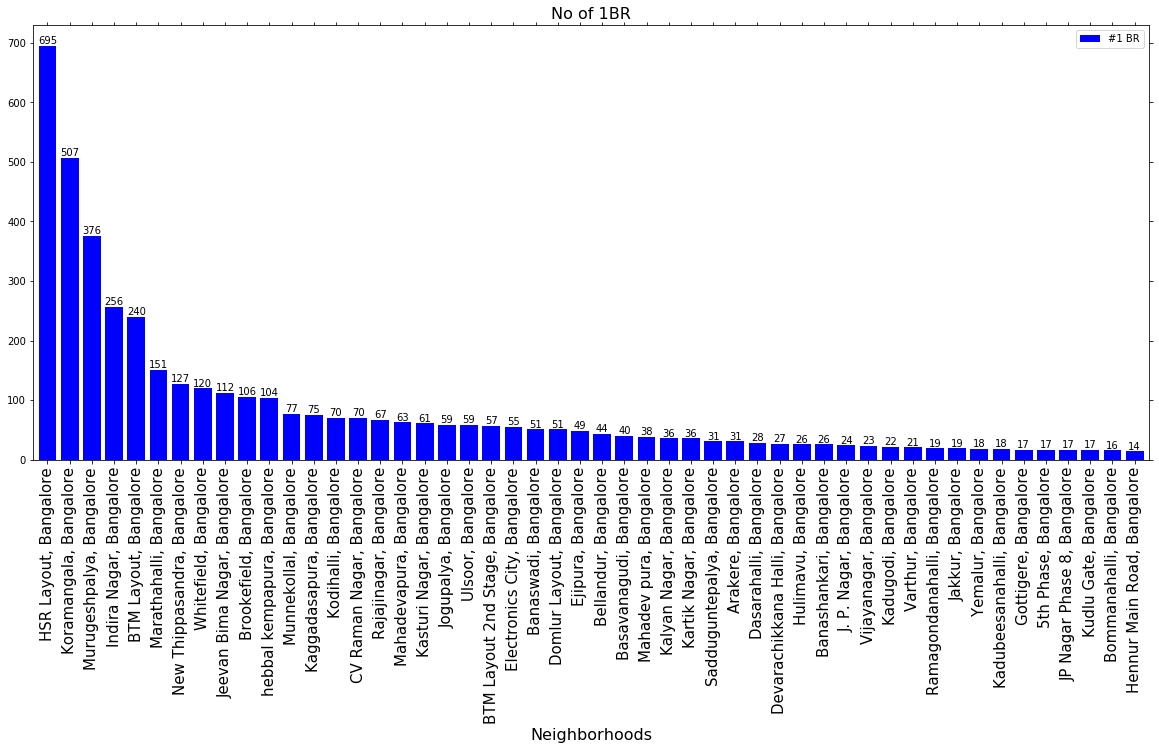

In [51]:
histo_1 = Rental_1br.groupby('Location')['Title'].count().sort_values(ascending=False)[:50]
ax = histo_1.plot(kind='bar', figsize=(20, 8), rot=90, width = 0.8, color=[ 'blue'])
rects = ax.patches
labels = list(histo_1)
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + .05, label,
            ha='center', va='bottom', fontsize=10)
ax.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on') # remove borders
ax.xaxis.set_tick_params(labelsize=15) # set xticks as 14
ax.legend(fontsize=14) # set legend sie as 14
ax.set_title('No of 1BR', fontsize=16) # set title and add font size as 16
ax.set_xlabel('Neighborhoods', fontsize=16)
#ax.grid(False)  # remove grid
ax.set_facecolor("white") # set bg color white
ax.legend(['#1 BR'])

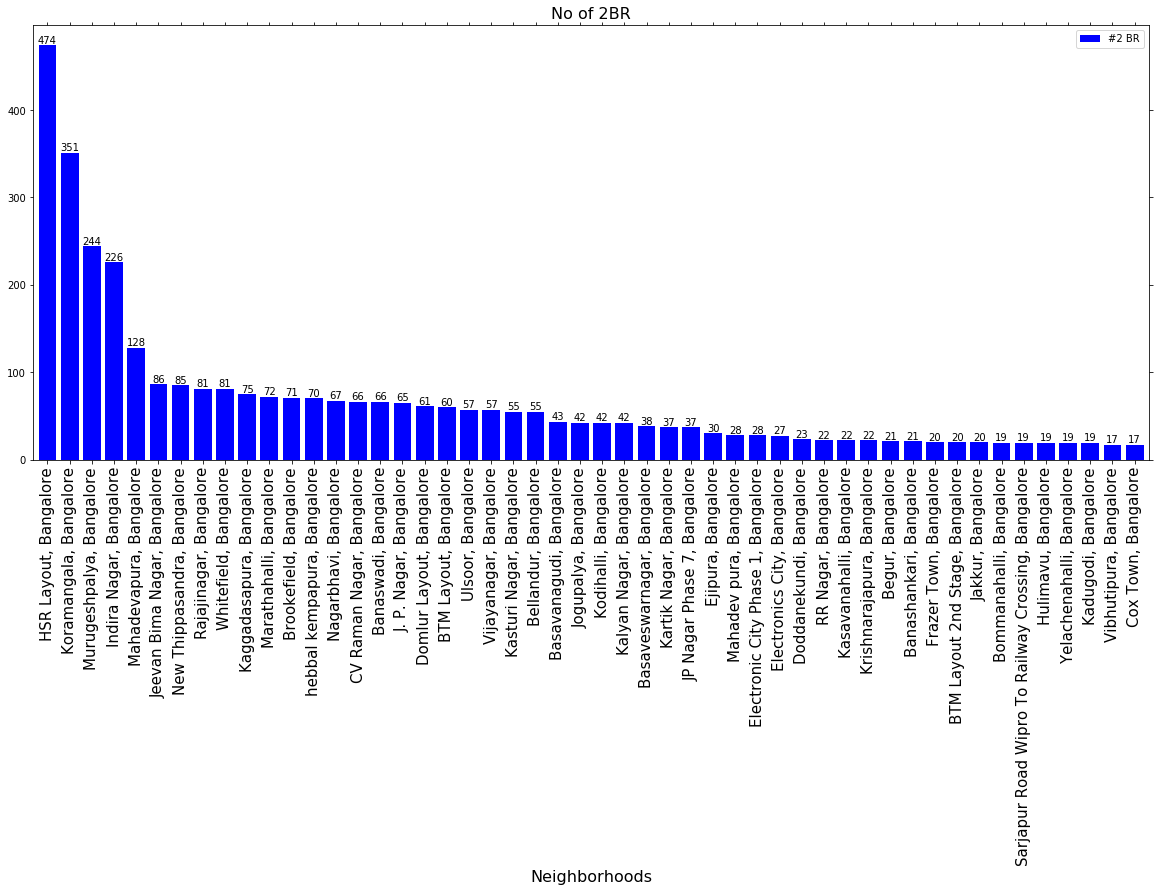

In [52]:
histo_2 = Rental_2br.groupby('Location')['Title'].count().sort_values(ascending=False)[:50]
ax = histo_2.plot(kind='bar', figsize=(20, 8), rot=90, width = 0.8, color=[ 'blue'])
rects = ax.patches
labels = list(histo_2)
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + .05, label,
            ha='center', va='bottom', fontsize=10)
ax.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on') # remove borders
ax.xaxis.set_tick_params(labelsize=15) # set xticks as 14
ax.legend(fontsize=14) # set legend sie as 14
ax.set_title('No of 2BR', fontsize=16) # set title and add font size as 16
ax.set_xlabel('Neighborhoods', fontsize=16)
#ax.grid(False)  # remove grid
ax.set_facecolor("white") # set bg color white
ax.legend(['#2 BR'])

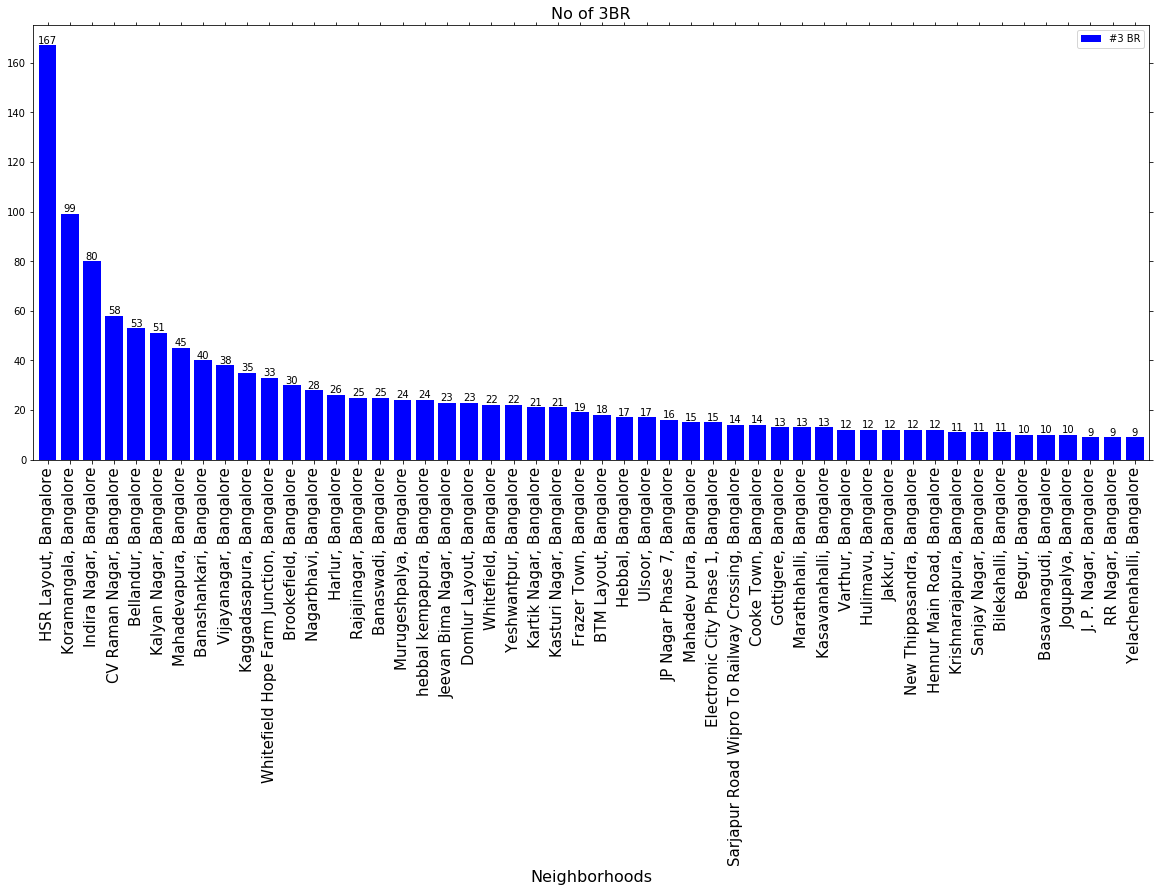

In [53]:
histo_3 = Rental_3br.groupby('Location')['Title'].count().sort_values(ascending=False)[:50]
ax = histo_3.plot(kind='bar', figsize=(20, 8), rot=90, width = 0.8, color=[ 'blue'])
rects = ax.patches
labels = list(histo_3)
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + .05, label,
            ha='center', va='bottom', fontsize=10)
ax.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on') # remove borders
ax.xaxis.set_tick_params(labelsize=15) # set xticks as 14
ax.legend(fontsize=14) # set legend sie as 14
ax.set_title('No of 3BR', fontsize=16) # set title and add font size as 16
ax.set_xlabel('Neighborhoods', fontsize=16)
#ax.grid(False)  # remove grid
ax.set_facecolor("white") # set bg color white
ax.legend(['#3 BR'])

### 1 BR - Furnishings Rental distribution

Text(0.5, 1.0, '1 BR - Furnishings Rental distribution')

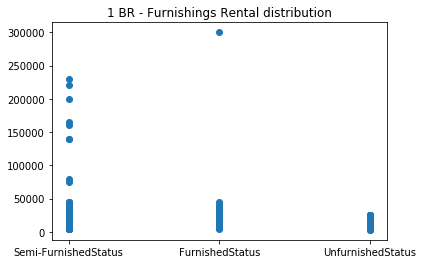

In [54]:
plt.scatter(Rental_data_25plus[Rental_data_25plus['No_bedrooms']==1]['Furnishings'], Rental_data_25plus[Rental_data_25plus['No_bedrooms']==1][' Rent '])
plt.title("1 BR - Furnishings Rental distribution")

### 2 BR - Furnishings Rental distribution

Text(0.5, 1.0, '2 BR - Furnishings Rental distribution')

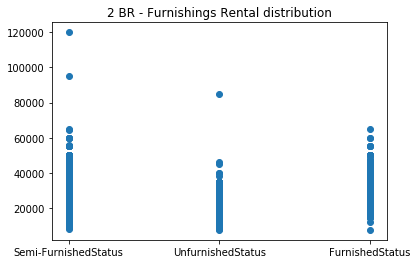

In [55]:
plt.scatter(Rental_data_25plus[Rental_data_25plus['No_bedrooms']==2]['Furnishings'], Rental_data_25plus[Rental_data_25plus['No_bedrooms']==2][' Rent '])
plt.title("2 BR - Furnishings Rental distribution")

### 3 BR - Furnishings Rental distribution

Text(0.5, 1.0, '3 BR - Furnishings Rental distribution')

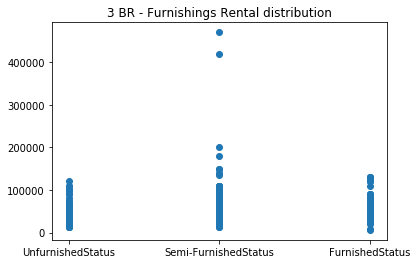

In [56]:
plt.scatter(Rental_data_25plus[Rental_data_25plus['No_bedrooms']==3]['Furnishings'], Rental_data_25plus[Rental_data_25plus['No_bedrooms']==3][' Rent '])
plt.title("3 BR - Furnishings Rental distribution")

### 1 BR - SQFT - Rental relationship

Text(0.5, 1.0, '3 BR - Furnishings Rental distribution')

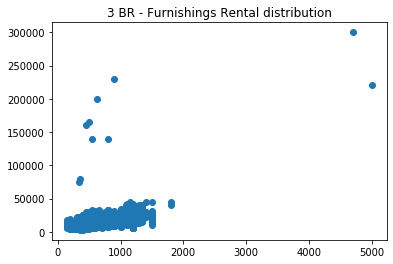

In [57]:
plt.scatter(Rental_data_25plus[Rental_data_25plus['No_bedrooms']==1]['Area-sqft'], Rental_data_25plus[Rental_data_25plus['No_bedrooms']==1][' Rent '])
plt.title("3 BR - Furnishings Rental distribution")

### 2 BR - SQFT - Rental relationship

Text(0.5, 1.0, '2 BR - Furnishings Rental distribution')

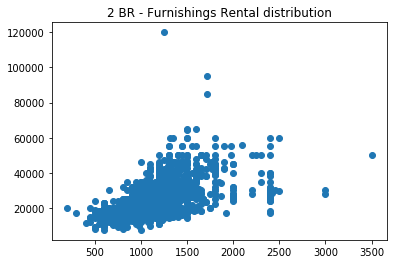

In [58]:
plt.scatter(Rental_data_25plus[Rental_data_25plus['No_bedrooms']==2]['Area-sqft'], Rental_data_25plus[Rental_data_25plus['No_bedrooms']==2][' Rent '])
plt.title("2 BR - Furnishings Rental distribution")

### 3 BR - SQFT - Rental relationship

Text(0.5, 1.0, '3 BR - Furnishings Rental distribution')

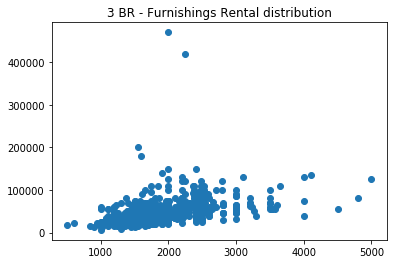

In [59]:
plt.scatter(Rental_data_25plus[Rental_data_25plus['No_bedrooms']==3]['Area-sqft'], Rental_data_25plus[Rental_data_25plus['No_bedrooms']==3][' Rent '])
plt.title("3 BR - Furnishings Rental distribution")

In [60]:
import seaborn as sns

## Rent distribution based on Sqft Ranges

In [61]:
df_area = Rental_data_25plus.loc[:,[' Rent ', 'areasqft_category']]
df_area.shape

(9995, 2)

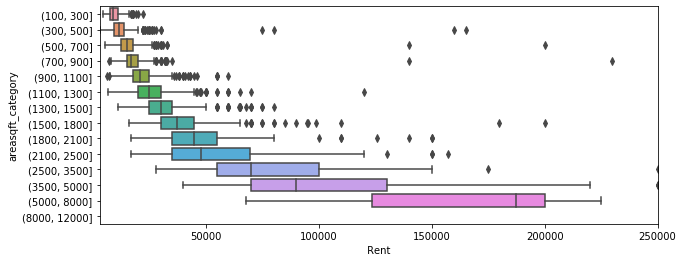

In [62]:
fig_dims = (10, 4)
fig, ax = plt.subplots(figsize=fig_dims)


sns.boxplot(x=" Rent ", y="areasqft_category", data=df_area, orient="h",ax=ax) 
plt.xlim(3000, 250000)
plt.show()


## Rent distribution based on number of Bedrooms

In [63]:
df_bed = Rental_data_25plus[[' Rent ', 'No_bedrooms']]


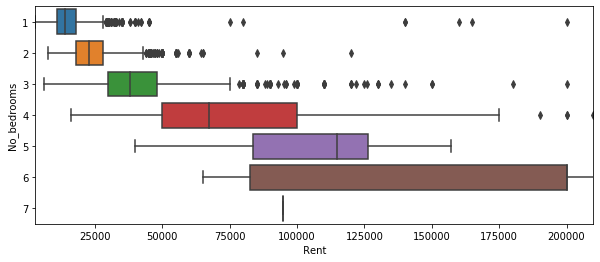

In [64]:
fig_dims = (10, 4)
fig, ax = plt.subplots(figsize=fig_dims)


sns.boxplot(x=" Rent ", y="No_bedrooms", data=df_bed, orient="h",ax=ax) 
plt.xlim(3000, 210000)
plt.show()


In [65]:
rental_data_dff.shape

(10742, 12)

### In order to understand the relationship between rentals and neighborhood, we should explore these neighbourhoods and capture what kind of venues are present.

In [251]:
import requests
from pandas.io.json import json_normalize

In [252]:
CLIENT_ID = 'XUITO1AP1IWUNYVT5EBOLAFD5GAIATQGXD0AYJ0HMT21OD4F' # your Foursquare ID
CLIENT_SECRET = 'KSZTSDQEHMFYQHQEUIE1ML4KPE4XZJ3P1JZOGT3TIOBOLNSF' # your Foursquare Secret
VERSION = '20200625'
LIMIT = 200
radius = 3000

In [253]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [254]:
rental_data_df.head(2)

Title                            Location   Rent  \
0  2 BHK Independent House  3G Homes Crimson Layout, Bangalore  10500   
1  2 BHK Independent House  3G Homes Crimson Layout, Bangalore   9500   

   Area-sqft  Bedroom  Bathroom  Address_lat  Address_lng  Furnished  \
0       1111        2         2    12.987072    77.762878          0   
1       1111        2         2    12.987072    77.762878          0   

   Semifurnished  Unfurnished  East facing  West facing  NorthEast facing  \
0              1            0            0            0                 0   
1              1            0            0            0                 0   

   South facing  North facing  NorthWest facing  SouthEast facing  \
0             0             0                 1                 0   
1             0             0                 1                 0   

   SouthWest facing  
0                 0  
1                 0

In [282]:
neigh_lat_lng = rental_data_df.groupby(['Location'])['Address_lat', 'Address_lng'].first()
neigh_lat_lng = neigh_lat_lng.reset_index()

/Users/loveypathak/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [283]:
#neigh_lat_lng.drop(columns = ['index','level_0'], inplace = True)
neigh_lat_lng.head(5)


Location  Address_lat  Address_lng
0              3G Homes Crimson Layout, Bangalore    12.987072    77.762878
1                3rd Stage BEML Layout, Bangalore    12.919145    77.520432
2   9th Main Hongasandra GB Palya Road, Bangalore    12.897584    77.629189
3        AECS Layout D Block Bangalore, Bangalore    12.960690    77.711891
4  AECS Layout Sri Nivasa Reddy Layout, Bangalore    12.963762    77.708984

In [268]:
def getNearbyVenues(names, latitudes, longitudes, radius=3000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        try:
            results = requests.get(url).json()["response"]['groups'][0]['items']
        except:
            results = []
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Category']
    
    return(nearby_venues)

In [348]:
Neighborhood_venues = getNearbyVenues(names=neigh_lat_lng['Location'],
                                   latitudes=neigh_lat_lng['Address_lat'],
                                   longitudes=neigh_lat_lng['Address_lng'])

In [285]:
# Save Neighborhood_venues file to csv.
Neighborhood_venues.to_csv('Neighborhood_venues.csv')

In [16]:
Neighborhood_venues = pd.read_csv("Neighborhood_venues.csv")

In [19]:
Neighborhood_venues.head(3)

Neighborhood  Neighborhood Latitude  \
0  3G Homes Crimson Layout, Bangalore              12.987072   
1  3G Homes Crimson Layout, Bangalore              12.987072   
2  3G Homes Crimson Layout, Bangalore              12.987072   

   Neighborhood Longitude             Venue               Venue Category  
0               77.762878         Golds Gym         Gym / Fitness Center  
1               77.762878   Barbeque Nation                    BBQ Joint  
2               77.762878  Herbs and Spices  Eastern European Restaurant

In [20]:
Neighborhood_venues_counts = Neighborhood_venues.groupby('Neighborhood').count()

In [21]:
print('There are {} uniques categories.'.format(len(Neighborhood_venues['Venue Category'].unique())))

There are 247 uniques categories.


In [289]:
Neighborhood_venues.shape

(40571, 5)

## Analyze Each Neighborhood

In [22]:
# one hot encoding
Blr_onehot_df = pd.get_dummies(Neighborhood_venues[['Venue Category']], prefix="", prefix_sep="")

In [23]:
Blr_onehot_df.to_csv('Blr_onehot.csv')

In [111]:
Blr_onehot_df = Blr_onehot_df.replace(np.nan, 0)

In [24]:
Blr_onehot_df.head(2)

ATM  Accessories Store  Afghan Restaurant  Airport  Airport Terminal  \
0    0                  0                  0        0                 0   
1    0                  0                  0        0                 0   

   American Restaurant  Andhra Restaurant  Arcade  Art Gallery  Art Museum  \
0                    0                  0       0            0           0   
1                    0                  0       0            0           0   

   ...  Udupi Restaurant  Vegetarian / Vegan Restaurant  \
0  ...                 0                              0   
1  ...                 0                              0   

   Vietnamese Restaurant  Warehouse Store  Wine Bar  Wine Shop  Wings Joint  \
0                      0                0         0          0            0   
1                      0                0         0          0            0   

   Women's Store  Yoga Studio  Zoo  
0              0            0    0  
1              0            0    0  

[2 rows x 247 columns]

In [25]:
# add neighborhood column back to dataframe
Blr_onehot_df['Neighborhood'] = Neighborhood_venues['Neighborhood']

In [26]:
Blr_onehot_df.shape

(40571, 247)

In [27]:
cols = list(Blr_onehot_df)
#cols
cols.insert(0, cols.pop(cols.index('Neighborhood')))
Blr_onehot_df = Blr_onehot_df.loc[:, cols]

In [28]:
import pandas as pd

In [29]:
Blr_onehot_df.head(2)

Neighborhood  ATM  Accessories Store  \
0  3G Homes Crimson Layout, Bangalore    0                  0   
1  3G Homes Crimson Layout, Bangalore    0                  0   

   Afghan Restaurant  Airport  Airport Terminal  American Restaurant  \
0                  0        0                 0                    0   
1                  0        0                 0                    0   

   Andhra Restaurant  Arcade  Art Gallery  ...  Udupi Restaurant  \
0                  0       0            0  ...                 0   
1                  0       0            0  ...                 0   

   Vegetarian / Vegan Restaurant  Vietnamese Restaurant  Warehouse Store  \
0                              0                      0                0   
1                              0                      0                0   

   Wine Bar  Wine Shop  Wings Joint  Women's Store  Yoga Studio  Zoo  
0         0          0            0              0            0    0  
1         0          0            0              0            0    0  

[2 rows x 247 columns]

In [30]:
neighbor_grouped = Blr_onehot_df.groupby(['Neighborhood']).mean().reset_index()
neighbor_grouped.shape

(662, 247)

In [31]:
neighbor_grouped.head()

Neighborhood  ATM  Accessories Store  \
0              3G Homes Crimson Layout, Bangalore  0.0                0.0   
1                3rd Stage BEML Layout, Bangalore  0.0                0.0   
2   9th Main Hongasandra GB Palya Road, Bangalore  0.0                0.0   
3        AECS Layout D Block Bangalore, Bangalore  0.0                0.0   
4  AECS Layout Sri Nivasa Reddy Layout, Bangalore  0.0                0.0   

   Afghan Restaurant  Airport  Airport Terminal  American Restaurant  \
0                0.0      0.0               0.0             0.019608   
1                0.0      0.0               0.0             0.000000   
2                0.0      0.0               0.0             0.000000   
3                0.0      0.0               0.0             0.010000   
4                0.0      0.0               0.0             0.010000   

   Andhra Restaurant    Arcade  Art Gallery  ...  Udupi Restaurant  \
0               0.00  0.000000          0.0  ...               0.0   
1               0.00  0.025641          0.0  ...               0.0   
2               0.00  0.000000          0.0  ...               0.0   
3               0.02  0.000000          0.0  ...               0.0   
4               0.02  0.000000          0.0  ...               0.0   

   Vegetarian / Vegan Restaurant  Vietnamese Restaurant  Warehouse Store  \
0                       0.019608                    0.0              0.0   
1                       0.000000                    0.0              0.0   
2                       0.041667                    0.0              0.0   
3                       0.030000                    0.0              0.0   
4                       0.030000                    0.0              0.0   

   Wine Bar  Wine Shop  Wings Joint  Women's Store  Yoga Studio  Zoo  
0       0.0        0.0          0.0            0.0          0.0  0.0  
1       0.0        0.0          0.0            0.0          0.0  0.0  
2       0.0        0.0          0.0            0.0          0.0  0.0  
3       0.0        0.0          0.0            0.0          0.0  0.0  
4       0.0        0.0          0.0            0.0          0.0  0.0  

[5 rows x 247 columns]

In [32]:
num_top_venues = 10

for hood in neighbor_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = neighbor_grouped[neighbor_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----3G Homes Crimson Layout, Bangalore----
                         venue  freq
0         Fast Food Restaurant  0.08
1                         Café  0.08
2            Indian Restaurant  0.06
3                        Hotel  0.06
4                    BBQ Joint  0.04
5                   Restaurant  0.04
6               Sandwich Place  0.04
7               Ice Cream Shop  0.04
8  Eastern European Restaurant  0.04
9                  Pizza Place  0.04


----3rd Stage BEML Layout, Bangalore----
                  venue  freq
0           Pizza Place  0.13
1                  Café  0.13
2     Indian Restaurant  0.10
3           Coffee Shop  0.10
4            Food Court  0.05
5  Fast Food Restaurant  0.05
6        Sandwich Place  0.05
7                  Park  0.05
8            Restaurant  0.03
9           Bus Station  0.03


----9th Main Hongasandra GB Palya Road, Bangalore----
                           venue  freq
0                           Café  0.12
1                 Ice Cream Shop  0.10
2   

In [33]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [34]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = neighbor_grouped['Neighborhood']

for ind in np.arange(neighbor_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(neighbor_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue  \
0              3G Homes Crimson Layout, Bangalore  Fast Food Restaurant   
1                3rd Stage BEML Layout, Bangalore           Pizza Place   
2   9th Main Hongasandra GB Palya Road, Bangalore                  Café   
3        AECS Layout D Block Bangalore, Bangalore     Indian Restaurant   
4  AECS Layout Sri Nivasa Reddy Layout, Bangalore     Indian Restaurant   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0                  Café     Indian Restaurant                 Hotel   
1                  Café           Coffee Shop     Indian Restaurant   
2        Ice Cream Shop      Department Store     Indian Restaurant   
3                  Café            Restaurant  Fast Food Restaurant   
4                  Café           Coffee Shop            Restaurant   

  5th Most Common Venue 6th Most Common Venue          7th Most Common Venue  \
0        Ice Cream Shop         Bowling Alley                    Pizza Place   
1        Sandwich Place                  Park                     Food Court   
2           Pizza Place    Punjabi Restaurant  Vegetarian / Vegan Restaurant   
3           Coffee Shop           Pizza Place                 Ice Cream Shop   
4  Fast Food Restaurant           Pizza Place                 Ice Cream Shop   

         8th Most Common Venue      9th Most Common Venue  \
0  Eastern European Restaurant                 Restaurant   
1         Fast Food Restaurant  Indian Chinese Restaurant   
2                 Liquor Store        Indie Movie Theater   
3                        Hotel         Chinese Restaurant   
4                        Hotel         Chinese Restaurant   

          10th Most Common Venue  
0                      BBQ Joint  
1                      Juice Bar  
2                     Steakhouse  
3  Vegetarian / Vegan Restaurant  
4                 Sandwich Place

In [35]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

## Cluster Neighborhoods

In [36]:
kclusters = 5

neighbor_grouped_clustering = neighbor_grouped.drop('Neighborhood', 1)
np.random.seed(32)
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(neighbor_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [37]:
#neighborhoods_venues_sorted = neighborhoods_venues_sorted.drop('Cluster Labels',axis = 1)
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [38]:
neighborhoods_venues_sorted.head()

Cluster Labels                                    Neighborhood  \
0               1              3G Homes Crimson Layout, Bangalore   
1               1                3rd Stage BEML Layout, Bangalore   
2               1   9th Main Hongasandra GB Palya Road, Bangalore   
3               1        AECS Layout D Block Bangalore, Bangalore   
4               1  AECS Layout Sri Nivasa Reddy Layout, Bangalore   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0  Fast Food Restaurant                  Café     Indian Restaurant   
1           Pizza Place                  Café           Coffee Shop   
2                  Café        Ice Cream Shop      Department Store   
3     Indian Restaurant                  Café            Restaurant   
4     Indian Restaurant                  Café           Coffee Shop   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0                 Hotel        Ice Cream Shop         Bowling Alley   
1     Indian Restaurant        Sandwich Place                  Park   
2     Indian Restaurant           Pizza Place    Punjabi Restaurant   
3  Fast Food Restaurant           Coffee Shop           Pizza Place   
4            Restaurant  Fast Food Restaurant           Pizza Place   

           7th Most Common Venue        8th Most Common Venue  \
0                    Pizza Place  Eastern European Restaurant   
1                     Food Court         Fast Food Restaurant   
2  Vegetarian / Vegan Restaurant                 Liquor Store   
3                 Ice Cream Shop                        Hotel   
4                 Ice Cream Shop                        Hotel   

       9th Most Common Venue         10th Most Common Venue  
0                 Restaurant                      BBQ Joint  
1  Indian Chinese Restaurant                      Juice Bar  
2        Indie Movie Theater                     Steakhouse  
3         Chinese Restaurant  Vegetarian / Vegan Restaurant  
4         Chinese Restaurant                 Sandwich Place

In [39]:
neigh_lat_lng.head(2)

NameError: name 'neigh_lat_lng' is not defined

In [309]:
neigh_lat_lng.rename(columns ={'Location':'Neighborhood'},inplace = True)

In [310]:
Rental_merged = neigh_lat_lng

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Rental_merged = Rental_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

In [311]:
Rental_merged.head() # check the last columns!

Neighborhood  Address_lat  Address_lng  \
0              3G Homes Crimson Layout, Bangalore    12.987072    77.762878   
1                3rd Stage BEML Layout, Bangalore    12.919145    77.520432   
2   9th Main Hongasandra GB Palya Road, Bangalore    12.897584    77.629189   
3        AECS Layout D Block Bangalore, Bangalore    12.960690    77.711891   
4  AECS Layout Sri Nivasa Reddy Layout, Bangalore    12.963762    77.708984   

   Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0             1.0  Fast Food Restaurant                  Café   
1             1.0           Pizza Place                  Café   
2             1.0                  Café        Ice Cream Shop   
3             1.0     Indian Restaurant                  Café   
4             1.0     Indian Restaurant                  Café   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0     Indian Restaurant                 Hotel        Ice Cream Shop   
1           Coffee Shop     Indian Restaurant        Sandwich Place   
2      Department Store     Indian Restaurant           Pizza Place   
3            Restaurant  Fast Food Restaurant           Coffee Shop   
4           Coffee Shop            Restaurant  Fast Food Restaurant   

  6th Most Common Venue          7th Most Common Venue  \
0         Bowling Alley                    Pizza Place   
1                  Park                     Food Court   
2    Punjabi Restaurant  Vegetarian / Vegan Restaurant   
3           Pizza Place                 Ice Cream Shop   
4           Pizza Place                 Ice Cream Shop   

         8th Most Common Venue      9th Most Common Venue  \
0  Eastern European Restaurant                 Restaurant   
1         Fast Food Restaurant  Indian Chinese Restaurant   
2                 Liquor Store        Indie Movie Theater   
3                        Hotel         Chinese Restaurant   
4                        Hotel         Chinese Restaurant   

          10th Most Common Venue  
0                      BBQ Joint  
1                      Juice Bar  
2                     Steakhouse  
3  Vegetarian / Vegan Restaurant  
4                 Sandwich Place

In [314]:
#Rental_merged['Cluster Labels']
#Rental_merged = Rental_merged[~Rental_merged.isin([np.nan, np.inf, -np.inf]).any(1)]

Rental_merged['Cluster Labels'] = Rental_merged['Cluster Labels'].astype(int)


In [315]:
# create map
map_clusters = folium.Map(location=[12.934533, 77.626579], zoom_start=11)
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
map_clusters

In [317]:
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Rental_merged['Address_lat'], Rental_merged['Address_lng'], Rental_merged['Neighborhood'], Rental_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [318]:
Rental_merged.head()

Neighborhood  Address_lat  Address_lng  \
0              3G Homes Crimson Layout, Bangalore    12.987072    77.762878   
1                3rd Stage BEML Layout, Bangalore    12.919145    77.520432   
2   9th Main Hongasandra GB Palya Road, Bangalore    12.897584    77.629189   
3        AECS Layout D Block Bangalore, Bangalore    12.960690    77.711891   
4  AECS Layout Sri Nivasa Reddy Layout, Bangalore    12.963762    77.708984   

   Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0               1  Fast Food Restaurant                  Café   
1               1           Pizza Place                  Café   
2               1                  Café        Ice Cream Shop   
3               1     Indian Restaurant                  Café   
4               1     Indian Restaurant                  Café   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0     Indian Restaurant                 Hotel        Ice Cream Shop   
1           Coffee Shop     Indian Restaurant        Sandwich Place   
2      Department Store     Indian Restaurant           Pizza Place   
3            Restaurant  Fast Food Restaurant           Coffee Shop   
4           Coffee Shop            Restaurant  Fast Food Restaurant   

  6th Most Common Venue          7th Most Common Venue  \
0         Bowling Alley                    Pizza Place   
1                  Park                     Food Court   
2    Punjabi Restaurant  Vegetarian / Vegan Restaurant   
3           Pizza Place                 Ice Cream Shop   
4           Pizza Place                 Ice Cream Shop   

         8th Most Common Venue      9th Most Common Venue  \
0  Eastern European Restaurant                 Restaurant   
1         Fast Food Restaurant  Indian Chinese Restaurant   
2                 Liquor Store        Indie Movie Theater   
3                        Hotel         Chinese Restaurant   
4                        Hotel         Chinese Restaurant   

          10th Most Common Venue  
0                      BBQ Joint  
1                      Juice Bar  
2                     Steakhouse  
3  Vegetarian / Vegan Restaurant  
4                 Sandwich Place

#### Investigate Clusters

## Cluster 1 - This cluster has the following properties:
1. Avg. bedroom size: 1.8
2. Avg. Rentals     : INR 16974
3. Avg. Area Sqft   : 940 SQFT

In [321]:
Rental_merged.loc[Rental_merged['Cluster Labels'] == 0, Rental_merged.columns[[0] + list(range(3, Rental_merged.shape[1]))]]

Neighborhood  Cluster Labels  \
15   Aishwarya Crystal Layout, Bangalore               0   
29         Anantha Nagar Road, Bangalore               0   
65         Bande Nalla Sandra, Bangalore               0   
70      Basapura Village Road, Bangalore               0   
71                   Basapura, Bangalore               0   
..                                   ...             ...   
610                  Varanasi, Bangalore               0   
613     Veerasandra Main Road, Bangalore               0   
614           Velankani Drive, Bangalore               0   
635               Vittasandra, Bangalore               0   
642              Yarandahalli, Bangalore               0   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
15      Indian Restaurant        Breakfast Spot           Coffee Shop   
29                  Hotel           Pizza Place    Chinese Restaurant   
65                    ATM       Warehouse Store          Tech Startup   
70      Indian Restaurant           Coffee Shop      Department Store   
71      Indian Restaurant           Coffee Shop      Department Store   
..                    ...                   ...                   ...   
610           Pizza Place                  Café                 Hotel   
613                 Hotel     Indian Restaurant           Coffee Shop   
614     Indian Restaurant                  Café           Coffee Shop   
635     Indian Restaurant      Department Store           Coffee Shop   
642                 Hotel           Pizza Place  Fast Food Restaurant   

          4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
15                  Pizza Place            Food Court                Bakery   
29          Sporting Goods Shop  Fast Food Restaurant      Basketball Court   
65            Indian Restaurant                Casino                 Hotel   
70         Fast Food Restaurant            Food Court                 Hotel   
71         Fast Food Restaurant            Food Court           Auto Garage   
..                          ...                   ...                   ...   
610           Indian Restaurant           Supermarket                Bakery   
613        Fast Food Restaurant                  Café           Pizza Place   
614        Fast Food Restaurant                 Hotel            Food Court   
635  Tourist Information Center        Breakfast Spot  Fast Food Restaurant   
642         Sporting Goods Shop                  Café     Indian Restaurant   

           7th Most Common Venue           8th Most Common Venue  \
15              Department Store                            Lake   
29                         Diner               Indian Restaurant   
65                    Food Court                     Event Space   
70                     BBQ Joint                     Pizza Place   
71                   Pizza Place  Multicuisine Indian Restaurant   
..                           ...                             ...   
610                        Field                        Creperie   
613                   Food Court              Chinese Restaurant   
614             Department Store                Asian Restaurant   
635                  Pizza Place                      Food Court   
642  Eastern European Restaurant                      Donut Shop   

              9th Most Common Venue 10th Most Common Venue  
15       Tourist Information Center           Soccer Field  
29                             Café            Coffee Shop  
65                    Event Service                  Diner  
70   Multicuisine Indian Restaurant         Sandwich Place  
71                   Sandwich Place         Breakfast Spot  
..                              ...                    ...  
610                      Donut Shop   Fast Food Restaurant  
613                Asian Restaurant    Sporting Goods Shop  
614                       BBQ Joint                    Bar  
635                    Soccer Field      Kerala Restau

## Cluster 2 - This cluster has the following properties:
1. Avg. bedroom size: 1.74
2. Avg. Rentals     : INR 23554
3. Avg. Area Sqft   : 1036 SQFT

In [320]:
Rental_merged.loc[Rental_merged['Cluster Labels'] == 1, Rental_merged.columns[[0] + list(range(3, Rental_merged.shape[1]))]]

Neighborhood  Cluster Labels  \
0                   3G Homes Crimson Layout, Bangalore               1   
1                     3rd Stage BEML Layout, Bangalore               1   
2        9th Main Hongasandra GB Palya Road, Bangalore               1   
3             AECS Layout D Block Bangalore, Bangalore               1   
4       AECS Layout Sri Nivasa Reddy Layout, Bangalore               1   
..                                                 ...             ...   
661                            kaggadaspura, Bangalore               1   
663                    koramangla 1st block, Bangalore               1   
664                         krishnarajapura, Bangalore               1   
665  prabhavathi residency 2 Nyanappanahalli Araker...               1   
667                          thirumenahalli, Bangalore               1   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0    Fast Food Restaurant                  Café     Indian Restaurant   
1             Pizza Place                  Café           Coffee Shop   
2                    Café        Ice Cream Shop      Department Store   
3       Indian Restaurant                  Café            Restaurant   
4       Indian Restaurant                  Café           Coffee Shop   
..                    ...                   ...                   ...   
661     Indian Restaurant            Donut Shop           Coffee Shop   
663                  Café     Indian Restaurant        Ice Cream Shop   
664     Indian Restaurant            Donut Shop                  Café   
665     Indian Restaurant           Pizza Place                  Café   
667          Tennis Court        Farmers Market                  Café   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0                   Hotel        Ice Cream Shop         Bowling Alley   
1       Indian Restaurant        Sandwich Place                  Park   
2       Indian Restaurant           Pizza Place    Punjabi Restaurant   
3    Fast Food Restaurant           Coffee Shop           Pizza Place   
4              Restaurant  Fast Food Restaurant           Pizza Place   
..                    ...                   ...                   ...   
661                  Café    Italian Restaurant         Bowling Alley   
663    Chinese Restaurant                Bakery    Italian Restaurant   
664           Coffee Shop        Ice Cream Shop                Lounge   
665      Department Store    Chinese Restaurant        Ice Cream Shop   
667           Music Venue                   Zoo            Donut Shop   

             7th Most Common Venue        8th Most Common Venue  \
0                      Pizza Place  Eastern European Restaurant   
1                       Food Court         Fast Food Restaurant   
2    Vegetarian / Vegan Restaurant                 Liquor Store   
3                   Ice Cream Shop                        Hotel   
4                   Ice Cream Shop                        Hotel   
..                             ...                          ...   
661                 Ice Cream Shop                Shopping Mall   
663                    Snack Place                 Burger Joint   
664           Fast Food Restaurant                Shopping Mall   
665        South Indian Restaurant                    Multiplex   
667                    Dry Cleaner          Dumpling Restaurant   

           9th Most Common Venue         10th Most Common Venue  
0                     Restaurant                      BBQ Joint  
1      Indian Chinese Restaurant                      Juice Bar  
2            Indie Movie Theater                     Steakhouse  
3             Chinese Restaurant  Vegetarian / Vegan Restaurant  
4             Chinese Restaurant                 Sandwich Place  
..                           ...                            ...  
661                       Lounge              French Restaurant  
663                 Dessert Shop                    Pizza Place  


## Cluster 3 - This cluster has the following properties:
1. Avg. bedroom size: 2.4
2. Avg. Rentals     : INR 20275
3. Avg. Area Sqft   : 1123 SQFT

In [322]:
Rental_merged.loc[Rental_merged['Cluster Labels'] == 2, Rental_merged.columns[[0] + list(range(3, Rental_merged.shape[1]))]]

Neighborhood  Cluster Labels 1st Most Common Venue  \
68   Bannerughatta, Bangalore               2                Resort   
272   Jangal Palya, Bangalore               2                  Park   
307   Kammmanhalli, Bangalore               2                Resort   
381         Magadi, Bangalore               2              Pharmacy   
452    Nelamangala, Bangalore               2                Resort   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
68                    Zoo                  Park                 Diner   
272                   Zoo                Resort                 Diner   
307                   Zoo    Dim Sum Restaurant  Fast Food Restaurant   
381                   Zoo                 Diner  Fast Food Restaurant   
452              Pharmacy    Athletics & Sports             BBQ Joint   

    5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
68   Fast Food Restaurant        Farmers Market                  Farm   
272  Fast Food Restaurant        Farmers Market                  Farm   
307        Farmers Market                  Farm    Falafel Restaurant   
381        Farmers Market                  Farm    Falafel Restaurant   
452              Platform                  Farm    Falafel Restaurant   

    8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
68     Falafel Restaurant           Event Space          Event Service  
272    Falafel Restaurant           Event Space          Event Service  
307           Event Space         Event Service      Electronics Store  
381           Event Space         Event Service      Electronics Store  
452           Event Space         Event Service      Electronics Store

## Cluster 4 - This cluster has the following properties:
1. Avg. bedroom size: 2.1
2. Avg. Rentals     : INR 29191
3. Avg. Area Sqft   : 1323 SQFT

In [323]:
Rental_merged.loc[Rental_merged['Cluster Labels'] == 3, Rental_merged.columns[[0] + list(range(3, Rental_merged.shape[1]))]]

Neighborhood  Cluster Labels  \
12              Adityanagar, Bangalore               3   
14          Agrahara Layout, Bangalore               3   
26       Anand Gokul Layout, Bangalore               3   
31               Anjanapura, Bangalore               3   
48               Azad Nagar, Bangalore               3   
..                                 ...             ...   
637      Vivekananda Colony, Bangalore               3   
643          Yelachenahalli, Bangalore               3   
654         byatarayanapura, Bangalore               3   
656               gubbalala, Bangalore               3   
662  kengeri satellite town, Bangalore               3   

       1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
12         Indian Restaurant                Bakery           Pizza Place   
14   North Indian Restaurant           Music Venue     Indian Restaurant   
26         Indian Restaurant           Pizza Place  Fast Food Restaurant   
31         Indian Restaurant                Lounge           Bus Station   
48         Indian Restaurant  Fast Food Restaurant        Breakfast Spot   
..                       ...                   ...                   ...   
637        Indian Restaurant        Ice Cream Shop  Fast Food Restaurant   
643        Indian Restaurant                  Café           Pizza Place   
654        Indian Restaurant        Ice Cream Shop  Fast Food Restaurant   
656        Indian Restaurant           Pizza Place                Bakery   
662                     Café     Indian Restaurant            Food Court   

       4th Most Common Venue          5th Most Common Venue  \
12            Ice Cream Shop                   Dessert Shop   
14                       Zoo                       Dive Bar   
26                      Café  Vegetarian / Vegan Restaurant   
31               Supermarket                         Resort   
48               Coffee Shop                    Pizza Place   
..                       ...                            ...   
637       Chinese Restaurant                    Coffee Shop   
643  South Indian Restaurant               Department Store   
654              Pizza Place                           Café   
656         Department Store                           Café   
662           Sandwich Place                    Bus Station   

       6th Most Common Venue        7th Most Common Venue  \
12                      Café                  Coffee Shop   
14                Donut Shop                  Dry Cleaner   
26            Ice Cream Shop                         Lake   
31                       Zoo  Eastern European Restaurant   
48                      Café               Ice Cream Shop   
..                       ...                          ...   
637  South Indian Restaurant                  Pizza Place   
643                   Bakery               Breakfast Spot   
654                     Lake                       Resort   
656       Athletics & Sports      South Indian Restaurant   
662         Department Store               Ice Cream Shop   

     8th Most Common Venue        9th Most Common Venue  \
12                Creperie            Convenience Store   
14     Dumpling Restaurant  Eastern European Restaurant   
26             Snack Place               Sandwich Place   
31             Dry Cleaner          Dumpling Restaurant   
48          Sandwich Place             Department Store   
..                     ...                          ...   
637                   Café               Breakfast Spot   
643  General Entertainment                  Coffee Shop   
654            Coffee Shop                        Hotel   
656             Sports Bar                 Burger Joint   
662          Grocery Store            Electronics Store   

          10th Most Common Venue  
12          Fast Food Restaurant  
14            Dim Sum Restaurant  
26             Kerala Restaurant  
31                 Event Service  
48                    Restaurant  
..     

## Cluster 5 - This cluster has the following properties:
1. Avg. bedroom size: 1.8
2. Avg. Rentals     : INR 20423
3. Avg. Area Sqft   : 1023 SQFT

In [324]:
Rental_merged.loc[Rental_merged['Cluster Labels'] == 4, Rental_merged.columns[[0] + list(range(3, Rental_merged.shape[1]))]]

Neighborhood  Cluster Labels  \
11                             Abbigere, Bangalore               4   
58                        Balaji Layout, Bangalore               4   
92               Blessing Garden Layout, Bangalore               4   
122     Chikkagubbi on Hennur Main Road, Bangalore               4   
130                       Chokkanahalli, Bangalore               4   
131                   Choodasandra Road, Bangalore               4   
132                        Choodasandra, Bangalore               4   
174           Dr.Shivaram Karanth Nagar, Bangalore               4   
180             Electronic City Flyover, Bangalore               4   
203                   Gunjur Palya road, Bangalore               4   
204                      Gunjur Village, Bangalore               4   
221                        Hegganahalli, Bangalore               4   
222                      Hegondanahalli, Bangalore               4   
226                           Hennur Rd, Bangalore               4   
235              Horamavu Banjara Lyout, Bangalore               4   
256                 Indradhanush Layout, Bangalore               4   
270                      Jalahalli West, Bangalore               4   
286             K Narayanapura Kothanur, Bangalore               4   
310     Kannur on Thanisandra Main Road, Bangalore               4   
311                              Kannur, Bangalore               4   
345                            Kothanur, Bangalore               4   
361  Kuvempu Layout on Hennur Main Road, Bangalore               4   
362                      Kvalasanahalli, Bangalore               4   
388                 Mallasandra Hoskote, Bangalore               4   
393                 Manipal County Road, Bangalore               4   
429          Nagareshwara   Nagenahalli, Bangalore               4   
430                          Nagasandra, Bangalore               4   
443    Narayanapura on Hennur Main Road, Bangalore               4   
444                        Narayanapura, Bangalore               4   
469                  Parappana Agrahara, Bangalore               4   
484                    R.K. Hegde Nagar, Bangalore               4   
493              Rachenahalli Main Road, Bangalore               4   
519                     Sai Baba Ashram, Bangalore               4   
526         Sanchar Nagar MCECHS Layout, Bangalore               4   
530                          Saraipalya, Bangalore               4   
559            Singasandra AECS B Block, Bangalore               4   
560     Singasandra AECS Layout A Block, Bangalore               4   
561                         Singasandra, Bangalore               4   
563                       Sinthan Nagar, Bangalore               4   
580                    State Highway 35, Bangalore               4   
600                        Thippasandra, Bangalore               4   
602                       Tirumanahalli, Bangalore               4   
611                             Varthur, Bangalore               4   
634               Visveshwaraiah Layout, Bangalore               4   
638                 Wellington Paradise, Bangalore               4   
652                       bhartiya city, Bangalore               4   
655             chokkanahalli Main Road, Bangalore               4   
666                          seegehalli, Bangalore               4   

    1st Most Common Venue          2nd Most Common Venue  \
11            Pizza Place                           Café   
58       Department Store              Indian Restaurant   
92            Pizza Place                    Coffee Shop   
122           Pizza Place                Badminton Court   
130           Pizza Place                        Stadium   
131           Pizza Place                Badminton Court   
132      Department Store                         Bakery   
174                  Café                    Pizza Place   
180      Department Store              Indian Restaurant   
203    

### Combine Cluster labels with rental_data_df

In [15]:
rental_data_df_clust_analysis = rental_data_df.rename(columns = {'Location':'Neighborhood'})

In [40]:
Rental_data_clust_df = rental_data_df_clust_analysis.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

In [331]:
#list(Rental_data_clust_df)
Rental_data_clust_df = Rental_data_clust_df.drop(columns = ['1st Most Common Venue','2nd Most Common Venue',
                                                             '3rd Most Common Venue','4th Most Common Venue',
                                                             '5th Most Common Venue','6th Most Common Venue',
                                                             '7th Most Common Venue','8th Most Common Venue',
                                                             '9th Most Common Venue','10th Most Common Venue'])

In [332]:
Rental_data_clust_df.head()

Title                        Neighborhood   Rent  \
0  2 BHK Independent House  3G Homes Crimson Layout, Bangalore  10500   
1  2 BHK Independent House  3G Homes Crimson Layout, Bangalore   9500   
2  1 BHK Independent House  3G Homes Crimson Layout, Bangalore   7000   
3  1 BHK Independent House  3G Homes Crimson Layout, Bangalore   6500   
4  1 BHK Independent House  3G Homes Crimson Layout, Bangalore   7500   

   Area-sqft  Bedroom  Bathroom  Address_lat  Address_lng  Furnished  \
0       1111        2         2    12.987072    77.762878          0   
1       1111        2         2    12.987072    77.762878          0   
2        666        1         1    12.987072    77.762878          0   
3        666        1         1    12.987072    77.762878          0   
4        666        1         1    12.987072    77.762878          0   

   Semifurnished  Unfurnished  East facing  West facing  NorthEast facing  \
0              1            0            0            0                 0   
1              1            0            0            0                 0   
2              1            0            0            0                 0   
3              1            0            0            0                 0   
4              1            0            0            0                 0   

   South facing  North facing  NorthWest facing  SouthEast facing  \
0             0             0                 1                 0   
1             0             0                 1                 0   
2             0             0                 1                 0   
3             0             0                 1                 0   
4             0             0                 1                 0   

   SouthWest facing  Cluster Labels  
0                 0             1.0  
1                 0             1.0  
2                 0             1.0  
3                 0             1.0  
4                 0             1.0

In [334]:
Cluster_Rent_means = Rental_data_clust_df.groupby('Cluster Labels')['Rent'].mean()
Cluster_bedroom_means = Rental_data_clust_df.groupby('Cluster Labels')['Bedroom'].mean()
Cluster_sqft_means = Rental_data_clust_df.groupby('Cluster Labels')['Area-sqft'].mean()

print(Cluster_Rent_means)
print(Cluster_bedroom_means)
print(Cluster_sqft_means)

Cluster Labels
0.0    16974.664894
1.0    23554.352720
2.0    20275.763158
3.0    29191.226852
4.0    20423.291139
Name: Rent, dtype: float64
Cluster Labels
0.0    1.840426
1.0    1.745841
2.0    2.394737
3.0    2.148148
4.0    1.822785
Name: Bedroom, dtype: float64
Cluster Labels
0.0     940.938830
1.0    1036.137336
2.0    1127.289474
3.0    1323.638889
4.0    1023.291139
Name: Area-sqft, dtype: float64


## Correlation Analysis

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

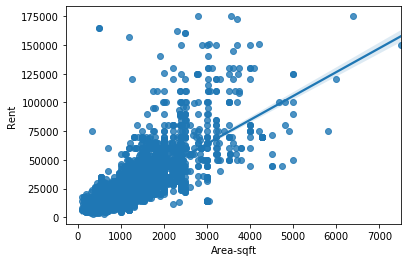

In [351]:
sns.regplot(x='Area-sqft' ,y= 'Rent', data = rental_data_df )

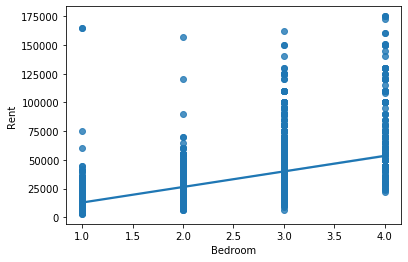

In [352]:
sns.regplot(x='Bedroom' ,y= 'Rent', data = rental_data_df )

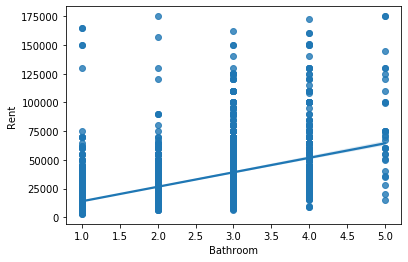

In [353]:
sns.regplot(x='Bathroom' ,y= 'Rent', data = rental_data_df )

In [354]:
rental_data_df.corr()

Rent  Area-sqft   Bedroom  Bathroom  Address_lat  \
Rent              1.000000   0.776903  0.667838  0.628858    -0.021800   
Area-sqft         0.776903   1.000000  0.820689  0.749122    -0.000969   
Bedroom           0.667838   0.820689  1.000000  0.808473     0.000581   
Bathroom          0.628858   0.749122  0.808473  1.000000    -0.038905   
Address_lat      -0.021800  -0.000969  0.000581 -0.038905     1.000000   
Address_lng      -0.070507  -0.078368 -0.113853 -0.152527     0.387799   
Furnished         0.173371   0.071524  0.035535  0.039715     0.006305   
Semifurnished    -0.100291  -0.025209 -0.036691 -0.028732     0.011536   
Unfurnished      -0.038409  -0.037586  0.013826 -0.001056    -0.021815   
East facing       0.057608   0.037495  0.038634  0.043737    -0.007589   
West facing       0.001380   0.007198  0.011725 -0.001563     0.106033   
NorthEast facing  0.029592   0.043476 -0.000413  0.008796    -0.019898   
South facing     -0.029480  -0.036243 -0.006828 -0.001042    -0.024166   
North facing     -0.024244  -0.038683 -0.033225 -0.038388    -0.012557   
NorthWest facing -0.093997  -0.044104 -0.042558 -0.043506    -0.036592   
SouthEast facing  0.020607   0.036877  0.030856  0.035548    -0.011347   
SouthWest facing -0.004307   0.004716  0.008249  0.001919    -0.009207   

                  Address_lng  Furnished  Semifurnished  Unfurnished  \
Rent                -0.070507   0.173371      -0.100291    -0.038409   
Area-sqft           -0.078368   0.071524      -0.025209    -0.037586   
Bedroom             -0.113853   0.035535      -0.036691     0.013826   
Bathroom            -0.152527   0.039715      -0.028732    -0.001056   
Address_lat          0.387799   0.006305       0.011536    -0.021815   
Address_lng          1.000000  -0.014520       0.124903    -0.153458   
Furnished           -0.014520   1.000000      -0.672363    -0.095278   
Semifurnished        0.124903  -0.672363       1.000000    -0.672793   
Unfurnished         -0.153458  -0.095278      -0.672793     1.000000   
East facing         -0.027832   0.041648      -0.009034    -0.029477   
West facing          0.176763  -0.006338      -0.002246     0.009355   
NorthEast facing    -0.033628  -0.000638       0.030067    -0.039797   
South facing        -0.037077   0.000159      -0.018801     0.025124   
North facing        -0.032103  -0.026045      -0.016181     0.047792   
NorthWest facing    -0.009362  -0.024713       0.042852    -0.032928   
SouthEast facing    -0.011525  -0.022679       0.014348     0.003372   
SouthWest facing    -0.018438   0.008301      -0.035023     0.038802   

                  East facing  West facing  NorthEast facing  South facing  \
Rent                 0.057608     0.001380          0.029592     -0.029480   
Area-sqft            0.037495     0.007198          0.043476     -0.036243   
Bedroom              0.038634     0.011725         -0.000413     -0.006828   
Bathroom             0.043737    -0.001563          0.008796     -0.001042   
Address_lat         -0.007589     0.106033         -0.019898     -0.024166   
Address_lng         -0.027832     0.176763         -0.033628     -0.037077   
Furnished            0.041648    -0.006338         -0.000638      0.000159   
Semifurnished       -0.009034    -0.002246          0.030067     -0.018801   
Unfurnished         -0.029477     0.009355         -0.039797      0.025124   
East facing          1.000000    -0.279325         -0.239420     -0.212667   
West facing         -0.279325     1.000000         -0.076112     -0.067607   
NorthEast facing    -0.239420    -0.076112          1.000000     -0.057949   
South facing        -0.212667    -0.067607         -0.057949      1.000000   
North facing        -0.580592    -0.184572         -0.158203     -0.140526   
NorthWest facing    -0.218631    -0.069503         -0.059574     -0.052917   
SouthEast facing    -0.091534    -0.029099         -0.024942     -0.022155   
SouthWest facing    -0.044358    -0.014102         -0.012087     -

### Correlation Analysis contd..

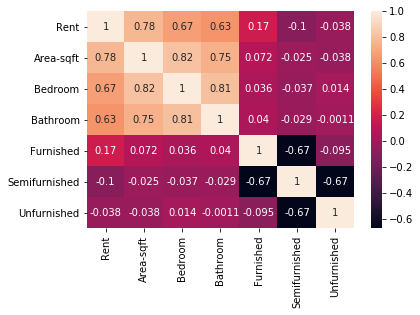

In [12]:
sns.heatmap(rental_data_df[['Rent','Area-sqft','Bedroom','Bathroom','Furnished','Semifurnished','Unfurnished']].corr(), annot = True)

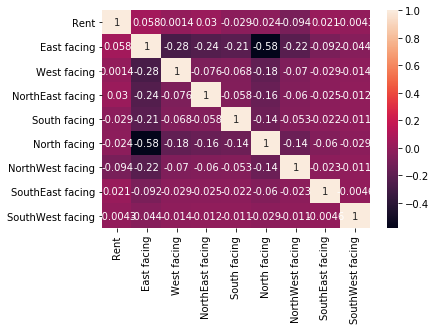

In [13]:
sns.heatmap(rental_data_df[['Rent','East facing','West facing','NorthEast facing','South facing','North facing','NorthWest facing','SouthEast facing','SouthWest facing']].corr(), annot = True)

# Clusterwise Rental distributions

In [43]:
list(Rental_data_clust_df)

['Title',
 'Neighborhood',
 'Rent',
 'Area-sqft',
 'Bedroom',
 'Bathroom',
 'Address_lat',
 'Address_lng',
 'Furnished',
 'Semifurnished',
 'Unfurnished',
 'East facing',
 'West facing',
 'NorthEast facing',
 'South facing',
 'North facing',
 'NorthWest facing',
 'SouthEast facing',
 'SouthWest facing',
 'Cluster Labels',
 '1st Most Common Venue',
 '2nd Most Common Venue',
 '3rd Most Common Venue',
 '4th Most Common Venue',
 '5th Most Common Venue',
 '6th Most Common Venue',
 '7th Most Common Venue',
 '8th Most Common Venue',
 '9th Most Common Venue',
 '10th Most Common Venue']

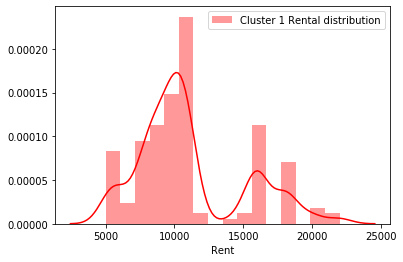

In [49]:
sns.distplot(Rental_data_clust_df[(Rental_data_clust_df['Cluster Labels'] == 0) & (Rental_data_clust_df['Bedroom'] == 1)]['Rent'], color = 'r',
             label = 'Cluster 1 Rental distribution')
plt.legend()

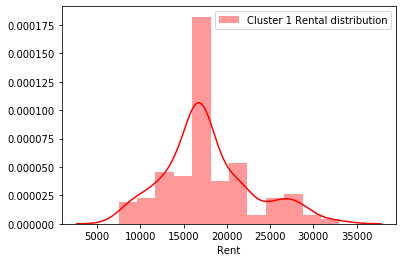

In [50]:
sns.distplot(Rental_data_clust_df[(Rental_data_clust_df['Cluster Labels'] == 0) & (Rental_data_clust_df['Bedroom'] == 2)]['Rent'], color = 'r',
             label = 'Cluster 1 Rental distribution')
plt.legend()

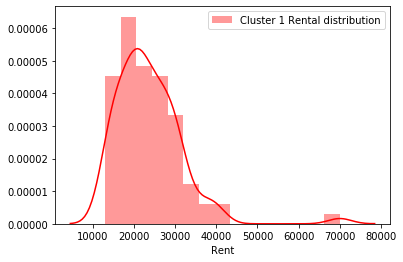

In [51]:
sns.distplot(Rental_data_clust_df[(Rental_data_clust_df['Cluster Labels'] == 0) & (Rental_data_clust_df['Bedroom'] == 3)]['Rent'], color = 'r',
             label = 'Cluster 1 Rental distribution')
plt.legend()

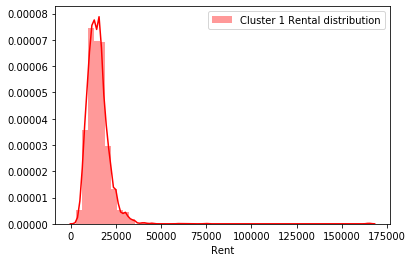

In [52]:
sns.distplot(Rental_data_clust_df[(Rental_data_clust_df['Cluster Labels'] == 1) & (Rental_data_clust_df['Bedroom'] == 1)]['Rent'], color = 'r',
             label = 'Cluster 1 Rental distribution')
plt.legend()

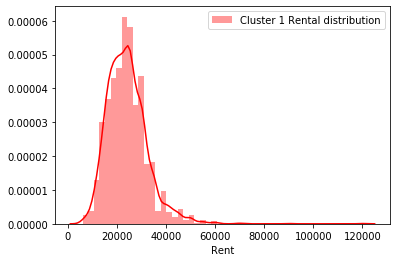

In [53]:
sns.distplot(Rental_data_clust_df[(Rental_data_clust_df['Cluster Labels'] == 1) & (Rental_data_clust_df['Bedroom'] == 2)]['Rent'], color = 'r',
             label = 'Cluster 1 Rental distribution')
plt.legend()

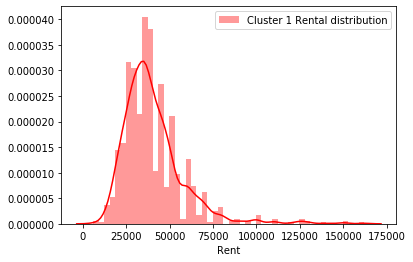

In [54]:
sns.distplot(Rental_data_clust_df[(Rental_data_clust_df['Cluster Labels'] == 1) & (Rental_data_clust_df['Bedroom'] == 3)]['Rent'], color = 'r',
             label = 'Cluster 1 Rental distribution')
plt.legend()

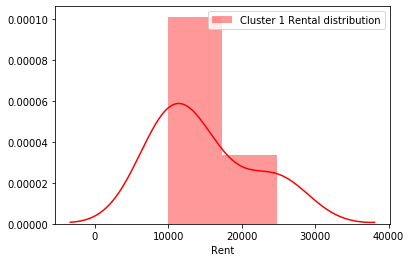

In [55]:
sns.distplot(Rental_data_clust_df[(Rental_data_clust_df['Cluster Labels'] == 2) & (Rental_data_clust_df['Bedroom'] == 1)]['Rent'], color = 'r',
             label = 'Cluster 1 Rental distribution')
plt.legend()

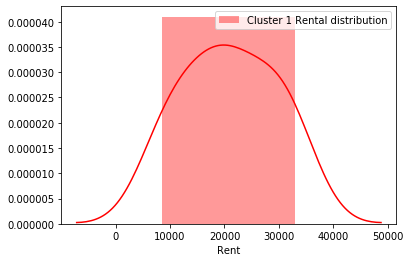

In [56]:
sns.distplot(Rental_data_clust_df[(Rental_data_clust_df['Cluster Labels'] == 2) & (Rental_data_clust_df['Bedroom'] == 2)]['Rent'], color = 'r',
             label = 'Cluster 1 Rental distribution')
plt.legend()

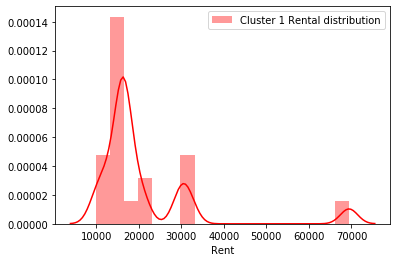

In [57]:
sns.distplot(Rental_data_clust_df[(Rental_data_clust_df['Cluster Labels'] == 2) & (Rental_data_clust_df['Bedroom'] == 3)]['Rent'], color = 'r',
             label = 'Cluster 1 Rental distribution')
plt.legend()

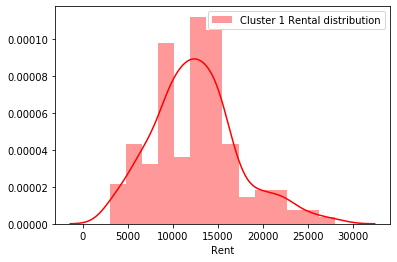

In [58]:
sns.distplot(Rental_data_clust_df[(Rental_data_clust_df['Cluster Labels'] == 3) & (Rental_data_clust_df['Bedroom'] == 1)]['Rent'], color = 'r',
             label = 'Cluster 1 Rental distribution')
plt.legend()

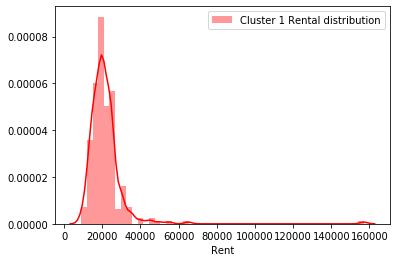

In [59]:
sns.distplot(Rental_data_clust_df[(Rental_data_clust_df['Cluster Labels'] == 3) & (Rental_data_clust_df['Bedroom'] == 2)]['Rent'], color = 'r',
             label = 'Cluster 1 Rental distribution')
plt.legend()

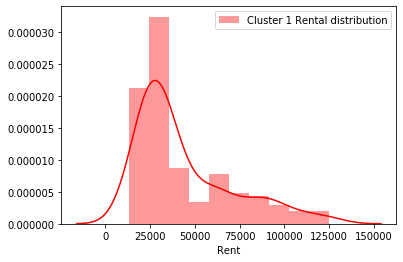

In [60]:
sns.distplot(Rental_data_clust_df[(Rental_data_clust_df['Cluster Labels'] == 3) & (Rental_data_clust_df['Bedroom'] == 3)]['Rent'], color = 'r',
             label = 'Cluster 1 Rental distribution')
plt.legend()

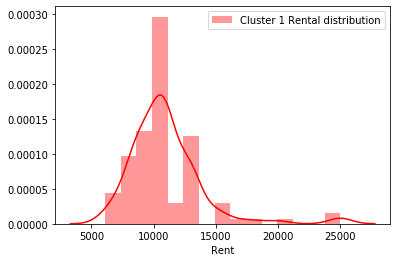

In [61]:
sns.distplot(Rental_data_clust_df[(Rental_data_clust_df['Cluster Labels'] == 4) & (Rental_data_clust_df['Bedroom'] == 1)]['Rent'], color = 'r',
             label = 'Cluster 1 Rental distribution')
plt.legend()

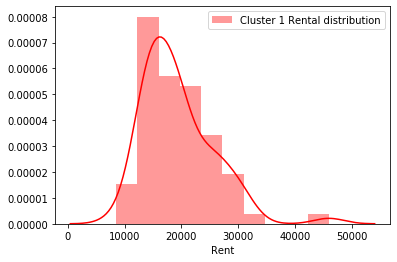

In [62]:
sns.distplot(Rental_data_clust_df[(Rental_data_clust_df['Cluster Labels'] == 4) & (Rental_data_clust_df['Bedroom'] == 2)]['Rent'], color = 'r',
             label = 'Cluster 1 Rental distribution')
plt.legend()

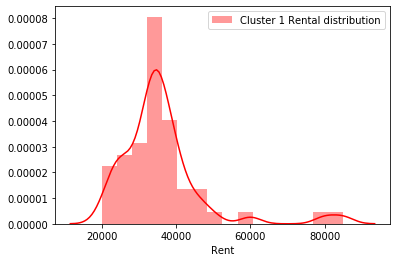

In [63]:
sns.distplot(Rental_data_clust_df[(Rental_data_clust_df['Cluster Labels'] == 4) & (Rental_data_clust_df['Bedroom'] == 3)]['Rent'], color = 'r',
             label = 'Cluster 1 Rental distribution')
plt.legend()

## Investigate significant values using multiple linear regression model

In [68]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [67]:
X_features = Rental_data_clust_df[[
 'Area-sqft',
 'Bedroom',
 'Bathroom',
 'Semifurnished',
 'Unfurnished',
 'East facing',
 'West facing',
 'NorthEast facing',
 'South facing',
 'North facing',
 'NorthWest facing',
 'SouthEast facing']]

In [83]:
X= sm.add_constant(X_features)
Y = Rental_data_clust_df['Rent']

In [70]:
train_X, test_X, train_Y, test_Y = train_test_split(X,Y, train_size = 0.8, random_state = 42)

In [89]:
model_1 = sm.OLS(train_Y, train_X).fit()
model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Results: Ordinary least squares
=======================================================================
Model:               OLS               Adj. R-squared:      0.619      
Dependent Variable:  Rent              AIC:                 167209.7797
Date:                2020-06-26 10:40  BIC:                 167251.6092
No. Observations:    7876              Log-Likelihood:      -83599.    
Df Model:            5                 F-statistic:         2561.      
Df Residuals:        7870              Prob (F-statistic):  0.00       
R-squared:           0.619             Scale:               9.7139e+07 
-----------------------------------------------------------------------
                Coef.    Std.Err.    t     P>|t|    [0.025     0.975]  
-----------------------------------------------------------------------
const          5901.7088 469.3591  12.5740 0.0000  4981.6404  6821.7772
Area-sqft        17.5132   0.3374  51.9023 0.0000    16.8518    18.1747
Bedroom         707.3750 282.2198   2.5065 0.0122   154.1492  1260.6008
Bathroom       2089.7466 240.4896   8.6896 0.0000  1618.3232  2561.1700
Semifurnished -6363.5113 401.1787 -15.8620 0.0000 -7149.9281 -5577.0945
Unfurnished   -7101.2810 536.8379 -13.2280 0.0000 -8153.6257 -6048.9362
-----------------------------------------------------------------------
Omnibus:              6963.728       Durbin-Watson:          1.999     
Prob(Omnibus):        0.000          Jarque-Bera (JB):       563060.642
Skew:                 3.872          Prob(JB):               0.000     
Kurtosis:             43.692         Condition No.:          7891      
=======================================================================
* The condition number is large (8e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

As per the p-value, only Area-sqft, Bedroom, Bathroom, Semifurnished, Unfurnished have come out significant. 

## Looking at the p-values, it is clear that rentals in any neighborhood is often depended on the size of apartment, bedrooms and bathroom counts along with the furnishing status & in which neighborhood rental property exists.